In [1]:
import lightgbm
print(lightgbm.__version__)

3.0.0


### 07. 위스콘신 유방암 예측
- 이진분류(악성 or 양성)
- Light GBM 사용

In [2]:
# LightGBM - LGBMClassifier => 사이킷런 분류 알고리즘용 Wrapper
import numpy as np
import pandas as pd

from lightgbm import LGBMClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [3]:
# 데이터 로딩
dataset = load_breast_cancer()

# 학습/테스트 사용 데이터 저장
ftr = dataset.data

# 답 저장
target = dataset.target

In [4]:
# 학습 데이터/ 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    ftr, target, test_size = 0.2, random_state = 156
)

In [5]:
# 객체 생성
# 중요 파라미터 : n_estimators => 생성할 트리 개수 
lgbm_clf = LGBMClassifier(n_estimators=400)

In [6]:
# 평가 데이터 지정
evals = [(X_test, y_test)]

# 학습 => 모델 생성
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_set=evals, verbose=True, eval_metric='logloss')


[1]	valid_0's binary_logloss: 0.565079
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355773
[7]	valid_0's binary_logloss: 0.329587
[8]	valid_0's binary_logloss: 0.308478
[9]	valid_0's binary_logloss: 0.285395
[10]	valid_0's binary_logloss: 0.267055
[11]	valid_0's binary_logloss: 0.252013
[12]	valid_0's binary_logloss: 0.237018
[13]	valid_0's binary_logloss: 0.224756
[14]	valid_0's binary_logloss: 0.213383
[15]	valid_0's binary_logloss: 0.203058
[16]	valid_0's binary_logloss: 0.194015
[17]	valid_0's binary_logloss: 0.186412
[18]	valid_0's binary_logloss: 0.179108
[19]	valid_0's binary_logloss: 0.174004
[20]	valid_0's binary_logloss: 0.167155
[21]	valid_0's binary_logloss: 0.162494
[22]	valid_0's binary_logloss: 0.156886
[23]	valid_0's binary_logloss: 0.152855
[24]	valid_0's binary_loglo

LGBMClassifier(n_estimators=400)

In [7]:
preds = lgbm_clf.predict(X_test)

In [8]:
# 정확도, 정밀도, 재현율, f1 score, roc_auc score 출력 function

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accu = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall_ = recall_score(y_test, pred)
    roc_auc= roc_auc_score(y_test, pred)
    
    print('오차행렬')
    print(confusion)
    
    out_str = '정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, auc : {3:.4f}'
    print(out_str.format(accu, precision, recall_, roc_auc))

In [9]:
get_clf_eval(y_test, preds)

오차행렬
[[33  4]
 [ 1 76]]
정확도 : 0.9561, 정밀도 : 0.9500, 재현율 : 0.9870, auc : 0.9395


In [10]:
# 중요 피처 출력
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

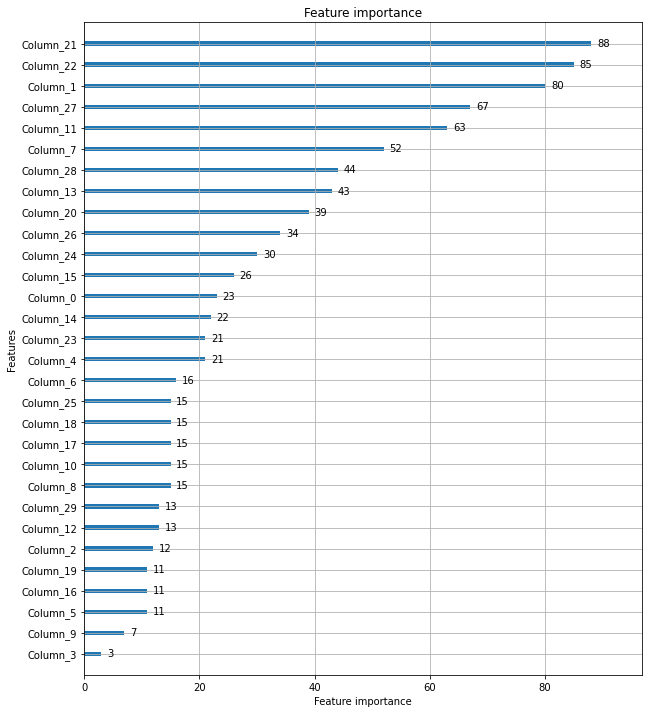

In [14]:
fig, ax = plt.subplots(figsize=(10,12))
# feature importance 출력
plot_importance(
      lgbm_clf    # 학습시킨 모델
    , ax=ax # 축 지정
    , 
)

### 08. 분류실습 - 캐글 산탄데르 고객 만족 예측
- 클래스 레이블 명 : TARGET ( 1: 불만 있는 고객, 0:만족한 고객) 

데이터 전처리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 데이터 로딩
cust_df = pd.read_csv('./data/santander/train.csv'
                      ,encoding='latin-1'
                     )

In [4]:
cust_df.shape
# row: 76000, col : 370, label : 371

(76020, 371)

In [5]:
cust_df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [6]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [23]:
# 레이블의 분포
cust_df.TARGET.value_counts()
# 1이 훨씬 적다. => 불균형 데이터 셋

0    73012
1     3008
Name: TARGET, dtype: int64

In [7]:
# 불만족 레이블의 비율 출력
# 불만족 개수 구하기
unsat_cnt = cust_df[cust_df['TARGET']==1].TARGET.count()
total_cnt = cust_df.TARGET.count()

print(round(unsat_cnt/total_cnt*100), '%')

4 %


In [30]:
# 데이터 형태 분석
cust_df.describe()


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [31]:
# var3 column 확인
cust_df['var3'].value_counts()
# 우선 이산형 데이터로 보임(<-> 연속형데이터)
# -999999 : 실데이터가 아닌, 임의로 집어넣은 값으로 보임 

 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 177           1
 87            1
 151           1
 215           1
 191           1
Name: var3, Length: 208, dtype: int64

In [8]:
# -000000 : => 116개를 '2'로 변환하기
cust_df['var3'].replace(-999999, 2 , inplace=True)

In [9]:
# 불필요한 컬럼 삭제
cust_df.drop('ID', axis=1, inplace=True)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# 학습/테스트할 데이터,답(마지막 컬럼) 분리
X_features = cust_df.iloc[:, : -1]
y_labels = cust_df.iloc[:, -1]

# 트레인, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_features, y_labels, test_size=0.2, random_state = 0
)

### XGBoost 모델로 학습

In [13]:
# XGBoost 사용
# n_estimators = 500, early_stoppting = 100
# 평가지표(eval_metric) : roc_auc
# eval_set= [(X_train, y_train),(X_test, y_test)]
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score


In [37]:
# xgb 객체 생성
xgb_clf = XGBClassifier(
      n_estimators=500   # 트리개수
    , random_state=156
)

In [38]:
# 학습
xgb_clf.fit(  X_train, y_train
            , early_stopping_rounds=100
            , eval_metric='auc'
            , eval_set=[(X_train, y_train),(X_test, y_test)]
           )

[0]	validation_0-auc:0.799928	validation_1-auc:0.803548
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.802222	validation_1-auc:0.805222
[2]	validation_0-auc:0.80819	validation_1-auc:0.813162
[3]	validation_0-auc:0.8127	validation_1-auc:0.813243
[4]	validation_0-auc:0.81648	validation_1-auc:0.816979
[5]	validation_0-auc:0.816018	validation_1-auc:0.816629
[6]	validation_0-auc:0.816474	validation_1-auc:0.817776
[7]	validation_0-auc:0.818148	validation_1-auc:0.818464
[8]	validation_0-auc:0.81806	validation_1-auc:0.818295
[9]	validation_0-auc:0.817039	validation_1-auc:0.818087
[10]	validation_0-auc:0.818318	validation_1-auc:0.818749
[11]	validation_0-auc:0.818711	validation_1-auc:0.818521
[12]	validation_0-auc:0.818673	validation_1-auc:0.818516
[13]	validation_0-auc:0.819156	validation_1-auc:0.818998
[14]	validation_0-auc:0.819847	validation_1-auc:0.81999
[15

[142]	validation_0-auc:0.861553	validation_1-auc:0.841335
[143]	validation_0-auc:0.861682	validation_1-auc:0.841346
[144]	validation_0-auc:0.86169	validation_1-auc:0.841403
[145]	validation_0-auc:0.861852	validation_1-auc:0.841299
[146]	validation_0-auc:0.861898	validation_1-auc:0.841301
[147]	validation_0-auc:0.861998	validation_1-auc:0.841289
[148]	validation_0-auc:0.862068	validation_1-auc:0.84135
[149]	validation_0-auc:0.862132	validation_1-auc:0.841444
[150]	validation_0-auc:0.862236	validation_1-auc:0.841409
[151]	validation_0-auc:0.862314	validation_1-auc:0.841459
[152]	validation_0-auc:0.862584	validation_1-auc:0.841456
[153]	validation_0-auc:0.862843	validation_1-auc:0.841483
[154]	validation_0-auc:0.863033	validation_1-auc:0.841493
[155]	validation_0-auc:0.863132	validation_1-auc:0.841534
[156]	validation_0-auc:0.863423	validation_1-auc:0.841728
[157]	validation_0-auc:0.863578	validation_1-auc:0.841712
[158]	validation_0-auc:0.863872	validation_1-auc:0.841677
[159]	validation

XGBClassifier(n_estimators=500, random_state=156)

In [14]:
# 예측확률 => predict_proba()[:,1]
pred_proba = xgb_clf.predict_proba(X_test)[:, 1]

# AUC 값
xgb_auc_score = roc_auc_score(
      y_test   # 테스트 데이터의 원래답
    , pred_proba
    , average='macro'
)

print('AUC : {0:.4f}'.format(xgb_auc_score))

NameError: name 'xgb_clf' is not defined

In [40]:
# 하이퍼 파라미터 튜닝
# GridSearchCV
# 객체 생성
xgb_clf = XGBClassifier(
      n_estimators=100
)

# 하이퍼 파라미터 지정
params = {
      'max_depth':[5,7]
    , 'min_child_weight': [1,3]
    , 'colsample_bytree' : [0.5, 0.75]   # 컬럼 일부만 가져오기 : 과적합 방지
}

In [41]:
from sklearn.model_selection import GridSearchCV

In [43]:
# GridSearchCV 객체 생성
grid_cv = GridSearchCV(
      xgb_clf
    , param_grid= params
    ,cv =3
)

In [44]:
import time
start_time = time.time()

# 학습 진행
# early_stopping 을 주게되면, 여기에 사용될 성능지표과 평가 set 파라미터가 추가로 들어가줘야 한다.
grid_cv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set = [(X_train, y_train),(X_test, y_test)])

end_time = time.time()
print('학습시간 : ', end_time - start_time)

[0]	validation_0-auc:0.715421	validation_1-auc:0.722463
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.802772	validation_1-auc:0.807648
[2]	validation_0-auc:0.800147	validation_1-auc:0.804566
[3]	validation_0-auc:0.805692	validation_1-auc:0.809325
[4]	validation_0-auc:0.814807	validation_1-auc:0.816951
[5]	validation_0-auc:0.810346	validation_1-auc:0.812634
[6]	validation_0-auc:0.810623	validation_1-auc:0.814491
[7]	validation_0-auc:0.818556	validation_1-auc:0.820561
[8]	validation_0-auc:0.822006	validation_1-auc:0.823553
[9]	validation_0-auc:0.820433	validation_1-auc:0.821292
[10]	validation_0-auc:0.826212	validation_1-auc:0.825279
[11]	validation_0-auc:0.830077	validation_1-auc:0.827817
[12]	validation_0-auc:0.832328	validation_1-auc:0.828775
[13]	validation_0-auc:0.832008	validation_1-auc:0.827865
[14]	validation_0-auc:0.830319	validation_1-auc:0.82674

[51]	validation_0-auc:0.86387	validation_1-auc:0.843007
[52]	validation_0-auc:0.864428	validation_1-auc:0.843608
[53]	validation_0-auc:0.86492	validation_1-auc:0.843887
[54]	validation_0-auc:0.865341	validation_1-auc:0.844128
[55]	validation_0-auc:0.865713	validation_1-auc:0.843955
[56]	validation_0-auc:0.866165	validation_1-auc:0.844301
[57]	validation_0-auc:0.866538	validation_1-auc:0.84439
[58]	validation_0-auc:0.86671	validation_1-auc:0.844055
[59]	validation_0-auc:0.866977	validation_1-auc:0.843974
[60]	validation_0-auc:0.867483	validation_1-auc:0.8439
[61]	validation_0-auc:0.867853	validation_1-auc:0.843561
[62]	validation_0-auc:0.86811	validation_1-auc:0.843594
[63]	validation_0-auc:0.868319	validation_1-auc:0.843498
[64]	validation_0-auc:0.868554	validation_1-auc:0.843615
[65]	validation_0-auc:0.869021	validation_1-auc:0.843756
[66]	validation_0-auc:0.869095	validation_1-auc:0.843781
[67]	validation_0-auc:0.869277	validation_1-auc:0.843635
[68]	validation_0-auc:0.869639	validat

[1]	validation_0-auc:0.804027	validation_1-auc:0.809028
[2]	validation_0-auc:0.796929	validation_1-auc:0.805684
[3]	validation_0-auc:0.80379	validation_1-auc:0.811591
[4]	validation_0-auc:0.811904	validation_1-auc:0.818375
[5]	validation_0-auc:0.808826	validation_1-auc:0.815714
[6]	validation_0-auc:0.809236	validation_1-auc:0.816054
[7]	validation_0-auc:0.818354	validation_1-auc:0.823376
[8]	validation_0-auc:0.822085	validation_1-auc:0.826164
[9]	validation_0-auc:0.82165	validation_1-auc:0.824633
[10]	validation_0-auc:0.825876	validation_1-auc:0.828152
[11]	validation_0-auc:0.830307	validation_1-auc:0.830536
[12]	validation_0-auc:0.832494	validation_1-auc:0.831414
[13]	validation_0-auc:0.832283	validation_1-auc:0.831058
[14]	validation_0-auc:0.830152	validation_1-auc:0.829388
[15]	validation_0-auc:0.833723	validation_1-auc:0.831545
[16]	validation_0-auc:0.835902	validation_1-auc:0.833087
[17]	validation_0-auc:0.838024	validation_1-auc:0.835309
[18]	validation_0-auc:0.840344	validation_

[57]	validation_0-auc:0.863066	validation_1-auc:0.845717
[58]	validation_0-auc:0.863413	validation_1-auc:0.845678
[59]	validation_0-auc:0.863608	validation_1-auc:0.84581
[60]	validation_0-auc:0.86412	validation_1-auc:0.845891
[61]	validation_0-auc:0.864399	validation_1-auc:0.845775
[62]	validation_0-auc:0.864521	validation_1-auc:0.845851
[63]	validation_0-auc:0.864786	validation_1-auc:0.845721
[64]	validation_0-auc:0.865062	validation_1-auc:0.845821
[65]	validation_0-auc:0.865567	validation_1-auc:0.845831
[66]	validation_0-auc:0.865616	validation_1-auc:0.845926
[67]	validation_0-auc:0.865942	validation_1-auc:0.845591
[68]	validation_0-auc:0.866071	validation_1-auc:0.845562
[69]	validation_0-auc:0.866158	validation_1-auc:0.845375
[70]	validation_0-auc:0.866421	validation_1-auc:0.845291
[71]	validation_0-auc:0.866631	validation_1-auc:0.845063
[72]	validation_0-auc:0.866834	validation_1-auc:0.844927
[73]	validation_0-auc:0.867035	validation_1-auc:0.844978
[74]	validation_0-auc:0.867128	va

Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.809965	validation_1-auc:0.808886
[2]	validation_0-auc:0.804423	validation_1-auc:0.807373
[3]	validation_0-auc:0.815189	validation_1-auc:0.816603
[4]	validation_0-auc:0.824234	validation_1-auc:0.823278
[5]	validation_0-auc:0.819568	validation_1-auc:0.81934
[6]	validation_0-auc:0.819199	validation_1-auc:0.818772
[7]	validation_0-auc:0.827364	validation_1-auc:0.826183
[8]	validation_0-auc:0.831947	validation_1-auc:0.829293
[9]	validation_0-auc:0.832248	validation_1-auc:0.827116
[10]	validation_0-auc:0.836511	validation_1-auc:0.829685
[11]	validation_0-auc:0.841032	validation_1-auc:0.831312
[12]	validation_0-auc:0.843673	validation_1-auc:0.831989
[13]	validation_0-auc:0.843697	validation_1-auc:0.832132
[14]	validation_0-auc:0.843356	validation_1-auc:0.830392
[15]	validation_0-auc:0.846759	validation_1-auc:0.83237

[77]	validation_0-auc:0.892957	validation_1-auc:0.844356
[78]	validation_0-auc:0.893228	validation_1-auc:0.84433
[79]	validation_0-auc:0.893375	validation_1-auc:0.844108
[80]	validation_0-auc:0.893476	validation_1-auc:0.844037
[81]	validation_0-auc:0.893656	validation_1-auc:0.844067
[82]	validation_0-auc:0.893838	validation_1-auc:0.843845
[83]	validation_0-auc:0.894993	validation_1-auc:0.84388
[84]	validation_0-auc:0.895174	validation_1-auc:0.843781
[85]	validation_0-auc:0.895171	validation_1-auc:0.844018
[86]	validation_0-auc:0.895293	validation_1-auc:0.843721
[87]	validation_0-auc:0.895377	validation_1-auc:0.843689
[88]	validation_0-auc:0.895614	validation_1-auc:0.8435
[89]	validation_0-auc:0.895597	validation_1-auc:0.84341
[90]	validation_0-auc:0.896023	validation_1-auc:0.843738
[91]	validation_0-auc:0.896194	validation_1-auc:0.843675
[92]	validation_0-auc:0.896304	validation_1-auc:0.843666
[93]	validation_0-auc:0.896388	validation_1-auc:0.8436
[94]	validation_0-auc:0.89645	validati

[17]	validation_0-auc:0.85058	validation_1-auc:0.835537
[18]	validation_0-auc:0.852488	validation_1-auc:0.836913
[19]	validation_0-auc:0.851413	validation_1-auc:0.83678
[20]	validation_0-auc:0.853824	validation_1-auc:0.837786
[21]	validation_0-auc:0.853711	validation_1-auc:0.836986
[22]	validation_0-auc:0.852989	validation_1-auc:0.835059
[23]	validation_0-auc:0.855112	validation_1-auc:0.836803
[24]	validation_0-auc:0.856859	validation_1-auc:0.838802
[25]	validation_0-auc:0.85723	validation_1-auc:0.83782
[26]	validation_0-auc:0.857535	validation_1-auc:0.836375
[27]	validation_0-auc:0.85929	validation_1-auc:0.837784
[28]	validation_0-auc:0.860972	validation_1-auc:0.837979
[29]	validation_0-auc:0.860682	validation_1-auc:0.837827
[30]	validation_0-auc:0.862143	validation_1-auc:0.838806
[31]	validation_0-auc:0.863184	validation_1-auc:0.839024
[32]	validation_0-auc:0.863638	validation_1-auc:0.838132
[33]	validation_0-auc:0.864268	validation_1-auc:0.838288
[34]	validation_0-auc:0.8644	validat

Stopping. Best iteration:
[65]	validation_0-auc:0.882333	validation_1-auc:0.843298

[0]	validation_0-auc:0.740963	validation_1-auc:0.745305
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.82294	validation_1-auc:0.821542
[2]	validation_0-auc:0.813813	validation_1-auc:0.809933
[3]	validation_0-auc:0.827473	validation_1-auc:0.822227
[4]	validation_0-auc:0.832393	validation_1-auc:0.826685
[5]	validation_0-auc:0.831888	validation_1-auc:0.822684
[6]	validation_0-auc:0.831945	validation_1-auc:0.821011
[7]	validation_0-auc:0.835043	validation_1-auc:0.824823
[8]	validation_0-auc:0.839917	validation_1-auc:0.82833
[9]	validation_0-auc:0.839675	validation_1-auc:0.827635
[10]	validation_0-auc:0.843606	validation_1-auc:0.829718
[11]	validation_0-auc:0.846078	validation_1-auc:0.833888
[12]	validation_0-auc:0.848075	validation_1-auc:0.834836
[13]	validation_0-auc:0.849433

[45]	validation_0-auc:0.860625	validation_1-auc:0.839082
[46]	validation_0-auc:0.860953	validation_1-auc:0.839125
[47]	validation_0-auc:0.861608	validation_1-auc:0.838995
[48]	validation_0-auc:0.862085	validation_1-auc:0.839059
[49]	validation_0-auc:0.862354	validation_1-auc:0.839387
[50]	validation_0-auc:0.862812	validation_1-auc:0.839298
[51]	validation_0-auc:0.863372	validation_1-auc:0.839127
[52]	validation_0-auc:0.864029	validation_1-auc:0.839097
[53]	validation_0-auc:0.864379	validation_1-auc:0.839118
[54]	validation_0-auc:0.864775	validation_1-auc:0.838848
[55]	validation_0-auc:0.86518	validation_1-auc:0.838897
[56]	validation_0-auc:0.865428	validation_1-auc:0.838671
[57]	validation_0-auc:0.865679	validation_1-auc:0.838451
[58]	validation_0-auc:0.866057	validation_1-auc:0.838382
[59]	validation_0-auc:0.866205	validation_1-auc:0.838363
[60]	validation_0-auc:0.866485	validation_1-auc:0.83804
[61]	validation_0-auc:0.866681	validation_1-auc:0.837604
[62]	validation_0-auc:0.867	valid

[17]	validation_0-auc:0.844972	validation_1-auc:0.836283
[18]	validation_0-auc:0.845411	validation_1-auc:0.836243
[19]	validation_0-auc:0.845623	validation_1-auc:0.837443
[20]	validation_0-auc:0.846563	validation_1-auc:0.837309
[21]	validation_0-auc:0.846794	validation_1-auc:0.837453
[22]	validation_0-auc:0.847843	validation_1-auc:0.837781
[23]	validation_0-auc:0.848615	validation_1-auc:0.838383
[24]	validation_0-auc:0.849434	validation_1-auc:0.838103
[25]	validation_0-auc:0.85036	validation_1-auc:0.838932
[26]	validation_0-auc:0.850801	validation_1-auc:0.838703
[27]	validation_0-auc:0.850936	validation_1-auc:0.837935
[28]	validation_0-auc:0.851557	validation_1-auc:0.837842
[29]	validation_0-auc:0.852139	validation_1-auc:0.837859
[30]	validation_0-auc:0.852693	validation_1-auc:0.8387
[31]	validation_0-auc:0.853579	validation_1-auc:0.838874
[32]	validation_0-auc:0.853998	validation_1-auc:0.838908
[33]	validation_0-auc:0.85455	validation_1-auc:0.839699
[34]	validation_0-auc:0.855415	vali

[59]	validation_0-auc:0.862575	validation_1-auc:0.839266
[60]	validation_0-auc:0.862755	validation_1-auc:0.839195
[61]	validation_0-auc:0.86307	validation_1-auc:0.839449
[62]	validation_0-auc:0.863241	validation_1-auc:0.839404
[63]	validation_0-auc:0.863658	validation_1-auc:0.839428
[64]	validation_0-auc:0.86375	validation_1-auc:0.839621
[65]	validation_0-auc:0.86421	validation_1-auc:0.839633
[66]	validation_0-auc:0.86447	validation_1-auc:0.839787
[67]	validation_0-auc:0.86483	validation_1-auc:0.839489
[68]	validation_0-auc:0.864976	validation_1-auc:0.839477
[69]	validation_0-auc:0.865145	validation_1-auc:0.83945
Stopping. Best iteration:
[39]	validation_0-auc:0.855169	validation_1-auc:0.840194

[0]	validation_0-auc:0.811089	validation_1-auc:0.810522
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.816087	validation_1-auc:0.810073
[2]	validation_0-auc:0.822

[27]	validation_0-auc:0.85049	validation_1-auc:0.838129
[28]	validation_0-auc:0.850674	validation_1-auc:0.837812
[29]	validation_0-auc:0.851227	validation_1-auc:0.838234
[30]	validation_0-auc:0.851623	validation_1-auc:0.838185
[31]	validation_0-auc:0.852504	validation_1-auc:0.838433
[32]	validation_0-auc:0.853015	validation_1-auc:0.838103
[33]	validation_0-auc:0.8536	validation_1-auc:0.838398
[34]	validation_0-auc:0.854335	validation_1-auc:0.838896
[35]	validation_0-auc:0.854663	validation_1-auc:0.839009
[36]	validation_0-auc:0.855138	validation_1-auc:0.839035
[37]	validation_0-auc:0.855351	validation_1-auc:0.839193
[38]	validation_0-auc:0.856105	validation_1-auc:0.839668
[39]	validation_0-auc:0.856527	validation_1-auc:0.83972
[40]	validation_0-auc:0.857019	validation_1-auc:0.840403
[41]	validation_0-auc:0.8577	validation_1-auc:0.840506
[42]	validation_0-auc:0.85823	validation_1-auc:0.840863
[43]	validation_0-auc:0.858341	validation_1-auc:0.840702
[44]	validation_0-auc:0.858849	validat

[4]	validation_0-auc:0.83547	validation_1-auc:0.826685
[5]	validation_0-auc:0.840865	validation_1-auc:0.832065
[6]	validation_0-auc:0.843256	validation_1-auc:0.831047
[7]	validation_0-auc:0.844488	validation_1-auc:0.82997
[8]	validation_0-auc:0.846035	validation_1-auc:0.83064
[9]	validation_0-auc:0.847946	validation_1-auc:0.831142
[10]	validation_0-auc:0.848745	validation_1-auc:0.831627
[11]	validation_0-auc:0.850347	validation_1-auc:0.832598
[12]	validation_0-auc:0.851272	validation_1-auc:0.832519
[13]	validation_0-auc:0.853669	validation_1-auc:0.834865
[14]	validation_0-auc:0.855251	validation_1-auc:0.835849
[15]	validation_0-auc:0.856435	validation_1-auc:0.83605
[16]	validation_0-auc:0.857587	validation_1-auc:0.836177
[17]	validation_0-auc:0.859351	validation_1-auc:0.836231
[18]	validation_0-auc:0.860285	validation_1-auc:0.836331
[19]	validation_0-auc:0.860357	validation_1-auc:0.837599
[20]	validation_0-auc:0.862392	validation_1-auc:0.83764
[21]	validation_0-auc:0.862808	validation_

[63]	validation_0-auc:0.89141	validation_1-auc:0.841085
[64]	validation_0-auc:0.891682	validation_1-auc:0.841143
[65]	validation_0-auc:0.892278	validation_1-auc:0.841065
[66]	validation_0-auc:0.892727	validation_1-auc:0.840958
[67]	validation_0-auc:0.893137	validation_1-auc:0.840921
[68]	validation_0-auc:0.893388	validation_1-auc:0.840771
[69]	validation_0-auc:0.893529	validation_1-auc:0.84087
[70]	validation_0-auc:0.893802	validation_1-auc:0.840709
[71]	validation_0-auc:0.893855	validation_1-auc:0.840794
[72]	validation_0-auc:0.894019	validation_1-auc:0.840836
[73]	validation_0-auc:0.894373	validation_1-auc:0.841008
[74]	validation_0-auc:0.894542	validation_1-auc:0.840932
[75]	validation_0-auc:0.894724	validation_1-auc:0.840937
Stopping. Best iteration:
[45]	validation_0-auc:0.884335	validation_1-auc:0.842062

[0]	validation_0-auc:0.816109	validation_1-auc:0.811
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-a

[59]	validation_0-auc:0.882357	validation_1-auc:0.841579
[60]	validation_0-auc:0.882716	validation_1-auc:0.841512
[61]	validation_0-auc:0.882939	validation_1-auc:0.841415
[62]	validation_0-auc:0.883049	validation_1-auc:0.841426
[63]	validation_0-auc:0.883365	validation_1-auc:0.841612
[64]	validation_0-auc:0.883681	validation_1-auc:0.841852
[65]	validation_0-auc:0.884057	validation_1-auc:0.841847
[66]	validation_0-auc:0.884053	validation_1-auc:0.841909
[67]	validation_0-auc:0.88446	validation_1-auc:0.841985
[68]	validation_0-auc:0.884938	validation_1-auc:0.841768
[69]	validation_0-auc:0.885009	validation_1-auc:0.841656
[70]	validation_0-auc:0.885288	validation_1-auc:0.841626
[71]	validation_0-auc:0.885498	validation_1-auc:0.841288
[72]	validation_0-auc:0.885587	validation_1-auc:0.841334
[73]	validation_0-auc:0.885921	validation_1-auc:0.841217
[74]	validation_0-auc:0.886022	validation_1-auc:0.841253
[75]	validation_0-auc:0.886104	validation_1-auc:0.841179
[76]	validation_0-auc:0.886118	v

[19]	validation_0-auc:0.846482	validation_1-auc:0.838554
[20]	validation_0-auc:0.848726	validation_1-auc:0.840214
[21]	validation_0-auc:0.847695	validation_1-auc:0.838583
[22]	validation_0-auc:0.84676	validation_1-auc:0.838167
[23]	validation_0-auc:0.848966	validation_1-auc:0.83963
[24]	validation_0-auc:0.850153	validation_1-auc:0.840161
[25]	validation_0-auc:0.850518	validation_1-auc:0.838865
[26]	validation_0-auc:0.850326	validation_1-auc:0.83861
[27]	validation_0-auc:0.851898	validation_1-auc:0.839714
[28]	validation_0-auc:0.853439	validation_1-auc:0.83974
[29]	validation_0-auc:0.853446	validation_1-auc:0.840649
[30]	validation_0-auc:0.854315	validation_1-auc:0.840818
[31]	validation_0-auc:0.855389	validation_1-auc:0.841412
[32]	validation_0-auc:0.855959	validation_1-auc:0.841502
[33]	validation_0-auc:0.856346	validation_1-auc:0.841478
[34]	validation_0-auc:0.856286	validation_1-auc:0.841234
[35]	validation_0-auc:0.857969	validation_1-auc:0.842276
[36]	validation_0-auc:0.859291	vali

In [45]:
grid_cv.best_params_

{'colsample_bytree': 0.5, 'max_depth': 5, 'min_child_weight': 1}

In [46]:
grid_cv.best_score_

0.9610135490660353

In [48]:
xgb_roc_score = roc_acgrid_cv.best_estimator_()

15204

In [50]:
xgb_clf.fit?

In [51]:
roc_auc_score?

In [53]:
y_test.value_counts()

0    14570
1      634
Name: TARGET, dtype: int64

### 여기부터 10/6 수업시작
- XGBoost 베스트 파라미터로 조금 더 튜닝

In [15]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

In [16]:
# 최적화 하이퍼 파라미터 기반 새로운 XGBoost 객체 생성
# n_estimators = 1000, learning_rate=0.02로 감소, reg_alpha=0.03 (규제 추가)
xgb_clf = XGBClassifier(
      n_estimators=1000
    , random_state=156
    , learning_rate=0.02
    , max_depth = 5
    , min_child_weight=1
    , colsample_bytree=0.75
    , reg_alpha=0.03
)

In [17]:
# 학습
xgb_clf.fit(
    X_train, y_train, early_stopping_rounds=200, eval_metric='auc', eval_set = [(X_train,y_train),(X_test,y_test)]
)

[0]	validation_0-auc:0.817284	validation_1-auc:0.811534
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.820302	validation_1-auc:0.812178
[2]	validation_0-auc:0.823363	validation_1-auc:0.816027
[3]	validation_0-auc:0.825007	validation_1-auc:0.81705
[4]	validation_0-auc:0.825243	validation_1-auc:0.817264
[5]	validation_0-auc:0.827563	validation_1-auc:0.819988
[6]	validation_0-auc:0.827812	validation_1-auc:0.819542
[7]	validation_0-auc:0.827855	validation_1-auc:0.819216
[8]	validation_0-auc:0.829221	validation_1-auc:0.819799
[9]	validation_0-auc:0.829078	validation_1-auc:0.818898
[10]	validation_0-auc:0.830731	validation_1-auc:0.820967
[11]	validation_0-auc:0.828293	validation_1-auc:0.819437
[12]	validation_0-auc:0.829608	validation_1-auc:0.821204
[13]	validation_0-auc:0.830487	validation_1-auc:0.821121
[14]	validation_0-auc:0.834894	validation_1-auc:0.82706

[141]	validation_0-auc:0.85609	validation_1-auc:0.840527
[142]	validation_0-auc:0.856058	validation_1-auc:0.840824
[143]	validation_0-auc:0.856179	validation_1-auc:0.840714
[144]	validation_0-auc:0.856461	validation_1-auc:0.840902
[145]	validation_0-auc:0.856596	validation_1-auc:0.840922
[146]	validation_0-auc:0.85682	validation_1-auc:0.840999
[147]	validation_0-auc:0.856856	validation_1-auc:0.841113
[148]	validation_0-auc:0.856846	validation_1-auc:0.84122
[149]	validation_0-auc:0.856846	validation_1-auc:0.841151
[150]	validation_0-auc:0.856784	validation_1-auc:0.841142
[151]	validation_0-auc:0.856753	validation_1-auc:0.841307
[152]	validation_0-auc:0.856646	validation_1-auc:0.841443
[153]	validation_0-auc:0.856637	validation_1-auc:0.841588
[154]	validation_0-auc:0.856957	validation_1-auc:0.841629
[155]	validation_0-auc:0.857008	validation_1-auc:0.841672
[156]	validation_0-auc:0.857301	validation_1-auc:0.841631
[157]	validation_0-auc:0.857543	validation_1-auc:0.841666
[158]	validation_

[283]	validation_0-auc:0.872776	validation_1-auc:0.843025
[284]	validation_0-auc:0.872829	validation_1-auc:0.843029
[285]	validation_0-auc:0.872917	validation_1-auc:0.842988
[286]	validation_0-auc:0.87303	validation_1-auc:0.842969
[287]	validation_0-auc:0.873159	validation_1-auc:0.842969
[288]	validation_0-auc:0.873233	validation_1-auc:0.843004
[289]	validation_0-auc:0.873346	validation_1-auc:0.843044
[290]	validation_0-auc:0.87339	validation_1-auc:0.843025
[291]	validation_0-auc:0.873534	validation_1-auc:0.843058
[292]	validation_0-auc:0.873577	validation_1-auc:0.843123
[293]	validation_0-auc:0.87364	validation_1-auc:0.843134
[294]	validation_0-auc:0.873695	validation_1-auc:0.843111
[295]	validation_0-auc:0.873769	validation_1-auc:0.843094
[296]	validation_0-auc:0.873849	validation_1-auc:0.843137
[297]	validation_0-auc:0.873987	validation_1-auc:0.843165
[298]	validation_0-auc:0.874085	validation_1-auc:0.843203
[299]	validation_0-auc:0.874167	validation_1-auc:0.843232
[300]	validation_

XGBClassifier(colsample_bytree=0.75, learning_rate=0.02, max_depth=5,
              n_estimators=1000, random_state=156, reg_alpha=0.03)

In [36]:
# AUC 출력
# 위에서 피팅시 나온 best score 인데 굳이 왜 다시 출력하는지 모르겠다
# 어쨌든 책에 나온 코드를 따라가고있음.
xgb_roc_auc = roc_auc_score(y_test, pred_prob[:,1], average='macro')

print('AUC : {0:.5f}'.format(xgb_roc_auc))

AUC : 0.84415


In [28]:
pred = xgb_clf.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
pred_prob = xgb_clf.predict_proba(X_test)
pred_prob

array([[0.9880302 , 0.01196978],
       [0.97610664, 0.02389335],
       [0.9841755 , 0.01582449],
       ...,
       [0.94424385, 0.05575613],
       [0.977616  , 0.02238401],
       [0.9805336 , 0.01946638]], dtype=float32)

In [31]:
y_test

36443    0
17577    0
28097    0
34967    0
50314    0
        ..
32940    0
64577    0
20344    0
53233    0
27150    0
Name: TARGET, Length: 15204, dtype: int64

### Light GBM 사용 (위와 동일한 데이터)

In [37]:
from lightgbm import LGBMClassifier

lgbm_clf= LGBMClassifier(n_estimators=1000)

In [40]:
import time

# 검증 데이터 셋 지정
start_ = time.time()
evals = [(X_test, y_test)]
lgbm_clf.fit(
    X_train, y_train
    , early_stopping_rounds=200
    , eval_metric='auc'
    , eval_set= evals
    , verbose=True
)

lgbm_auc = roc_auc_score(
    y_test, lgbm_clf.predict_proba(X_test)[:,1]
    , average='macro'
)

print('AUC:{0:.5f}'.format(lgbm_auc))
end_= time.time()
print(end_ - start_)

[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
Training until validation scores don't improve for 200 rounds
[2]	valid_0's auc: 0.818903	valid_0's binary_logloss: 0.160006
[3]	valid_0's auc: 0.827707	valid_0's binary_logloss: 0.156323
[4]	valid_0's auc: 0.832155	valid_0's binary_logloss: 0.153463
[5]	valid_0's auc: 0.834677	valid_0's binary_logloss: 0.151256
[6]	valid_0's auc: 0.834093	valid_0's binary_logloss: 0.149427
[7]	valid_0's auc: 0.837046	valid_0's binary_logloss: 0.147961
[8]	valid_0's auc: 0.837838	valid_0's binary_logloss: 0.146591
[9]	valid_0's auc: 0.839435	valid_0's binary_logloss: 0.145455
[10]	valid_0's auc: 0.83973	valid_0's binary_logloss: 0.144486
[11]	valid_0's auc: 0.839799	valid_0's binary_logloss: 0.143769
[12]	valid_0's auc: 0.840034	valid_0's binary_logloss: 0.143146
[13]	valid_0's auc: 0.840271	valid_0's binary_logloss: 0.142533
[14]	valid_0's auc: 0.840342	valid_0's binary_logloss: 0.142036
[15]	valid_0's auc: 0.840928	valid_0's binary_loglos

[134]	valid_0's auc: 0.835732	valid_0's binary_logloss: 0.14087
[135]	valid_0's auc: 0.835679	valid_0's binary_logloss: 0.140901
[136]	valid_0's auc: 0.835577	valid_0's binary_logloss: 0.140947
[137]	valid_0's auc: 0.835408	valid_0's binary_logloss: 0.140986
[138]	valid_0's auc: 0.83532	valid_0's binary_logloss: 0.141039
[139]	valid_0's auc: 0.835139	valid_0's binary_logloss: 0.141118
[140]	valid_0's auc: 0.835142	valid_0's binary_logloss: 0.141143
[141]	valid_0's auc: 0.835196	valid_0's binary_logloss: 0.141144
[142]	valid_0's auc: 0.835175	valid_0's binary_logloss: 0.141154
[143]	valid_0's auc: 0.835202	valid_0's binary_logloss: 0.141159
[144]	valid_0's auc: 0.835281	valid_0's binary_logloss: 0.141168
[145]	valid_0's auc: 0.835105	valid_0's binary_logloss: 0.141234
[146]	valid_0's auc: 0.835241	valid_0's binary_logloss: 0.14124
[147]	valid_0's auc: 0.835166	valid_0's binary_logloss: 0.141259
[148]	valid_0's auc: 0.835149	valid_0's binary_logloss: 0.141276
[149]	valid_0's auc: 0.83511

수행속도 2초로 XGBoost 에 비해 훨씬 빠르다

In [41]:
# Light GBM -> GridSearchCV
from sklearn.model_selection import GridSearchCV

lgbm_clf = LGBMClassifier(n_estimators=200)
params = {
      'num_leaves' : [32, 64]   # 하나의 트리가 가질수 있는 최대 리프 개수
    , 'max_depth' : [128, 160]   # 크게 잡아주어야 함.(LGBM 에서는 기본적으로 깊이가 깊어지는 방향으로 가니까)
    , 'min_child_samples' : [60, 100]
    , 'subsample' : [0.8, 1]

}

In [42]:
gridcv = GridSearchCV(
    lgbm_clf
    , param_grid=params
)

In [43]:
start_time = time.time()
gridcv.fit(
    X_train, y_train
    , early_stopping_rounds = 30
    , eval_metric ='auc'
    , eval_set = [(X_train, y_train),(X_test, y_test)]
)
end_time = time.time()

print('수행시간 : ' , end_time - start_time)

[1]	valid_0's auc: 0.823664	valid_0's binary_logloss: 0.156198	valid_1's auc: 0.821078	valid_1's binary_logloss: 0.16488
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.82966	valid_0's binary_logloss: 0.150925	valid_1's auc: 0.826326	valid_1's binary_logloss: 0.159774
[3]	valid_0's auc: 0.834498	valid_0's binary_logloss: 0.147158	valid_1's auc: 0.826852	valid_1's binary_logloss: 0.156113
[4]	valid_0's auc: 0.83904	valid_0's binary_logloss: 0.144173	valid_1's auc: 0.831417	valid_1's binary_logloss: 0.153186
[5]	valid_0's auc: 0.841964	valid_0's binary_logloss: 0.141745	valid_1's auc: 0.834593	valid_1's binary_logloss: 0.150797
[6]	valid_0's auc: 0.845253	valid_0's binary_logloss: 0.139712	valid_1's auc: 0.836659	valid_1's binary_logloss: 0.149062
[7]	valid_0's auc: 0.846545	valid_0's binary_logloss: 0.138053	valid_1's auc: 0.836148	valid_1's binary_logloss: 0.147537
[8]	valid_0's auc: 0.848885	valid_0's binary_logloss: 0.1366	valid_1's auc: 0.838153	val

[23]	valid_0's auc: 0.869182	valid_0's binary_logloss: 0.126269	valid_1's auc: 0.836587	valid_1's binary_logloss: 0.140588
[24]	valid_0's auc: 0.869979	valid_0's binary_logloss: 0.125886	valid_1's auc: 0.836766	valid_1's binary_logloss: 0.140496
[25]	valid_0's auc: 0.870956	valid_0's binary_logloss: 0.125545	valid_1's auc: 0.837001	valid_1's binary_logloss: 0.140322
[26]	valid_0's auc: 0.872886	valid_0's binary_logloss: 0.125108	valid_1's auc: 0.836911	valid_1's binary_logloss: 0.140274
[27]	valid_0's auc: 0.873971	valid_0's binary_logloss: 0.124767	valid_1's auc: 0.836733	valid_1's binary_logloss: 0.140247
[28]	valid_0's auc: 0.875129	valid_0's binary_logloss: 0.124434	valid_1's auc: 0.837012	valid_1's binary_logloss: 0.140143
[29]	valid_0's auc: 0.875873	valid_0's binary_logloss: 0.12414	valid_1's auc: 0.836866	valid_1's binary_logloss: 0.140163
[30]	valid_0's auc: 0.876465	valid_0's binary_logloss: 0.123865	valid_1's auc: 0.836337	valid_1's binary_logloss: 0.140195
[31]	valid_0's au

[22]	valid_0's auc: 0.869367	valid_0's binary_logloss: 0.126428	valid_1's auc: 0.839045	valid_1's binary_logloss: 0.140242
[23]	valid_0's auc: 0.870018	valid_0's binary_logloss: 0.126051	valid_1's auc: 0.838851	valid_1's binary_logloss: 0.140113
[24]	valid_0's auc: 0.871076	valid_0's binary_logloss: 0.125665	valid_1's auc: 0.838918	valid_1's binary_logloss: 0.139963
[25]	valid_0's auc: 0.871808	valid_0's binary_logloss: 0.12529	valid_1's auc: 0.838876	valid_1's binary_logloss: 0.139886
[26]	valid_0's auc: 0.872679	valid_0's binary_logloss: 0.124953	valid_1's auc: 0.838853	valid_1's binary_logloss: 0.139811
[27]	valid_0's auc: 0.873565	valid_0's binary_logloss: 0.124623	valid_1's auc: 0.838679	valid_1's binary_logloss: 0.139786
[28]	valid_0's auc: 0.874397	valid_0's binary_logloss: 0.124307	valid_1's auc: 0.83805	valid_1's binary_logloss: 0.139815
[29]	valid_0's auc: 0.87544	valid_0's binary_logloss: 0.124018	valid_1's auc: 0.837719	valid_1's binary_logloss: 0.139819
[30]	valid_0's auc:

[55]	valid_0's auc: 0.894518	valid_0's binary_logloss: 0.117157	valid_1's auc: 0.838831	valid_1's binary_logloss: 0.139538
[56]	valid_0's auc: 0.894919	valid_0's binary_logloss: 0.116983	valid_1's auc: 0.838866	valid_1's binary_logloss: 0.139562
[57]	valid_0's auc: 0.895096	valid_0's binary_logloss: 0.116832	valid_1's auc: 0.838982	valid_1's binary_logloss: 0.139544
[58]	valid_0's auc: 0.895448	valid_0's binary_logloss: 0.116643	valid_1's auc: 0.839062	valid_1's binary_logloss: 0.139518
[59]	valid_0's auc: 0.895699	valid_0's binary_logloss: 0.116514	valid_1's auc: 0.838981	valid_1's binary_logloss: 0.139543
[60]	valid_0's auc: 0.896178	valid_0's binary_logloss: 0.116313	valid_1's auc: 0.838833	valid_1's binary_logloss: 0.1396
Early stopping, best iteration is:
[30]	valid_0's auc: 0.878569	valid_0's binary_logloss: 0.123249	valid_1's auc: 0.841045	valid_1's binary_logloss: 0.139479
[1]	valid_0's auc: 0.823664	valid_0's binary_logloss: 0.156198	valid_1's auc: 0.821078	valid_1's binary_lo

[20]	valid_0's auc: 0.866024	valid_0's binary_logloss: 0.127497	valid_1's auc: 0.83704	valid_1's binary_logloss: 0.140979
[21]	valid_0's auc: 0.867294	valid_0's binary_logloss: 0.12703	valid_1's auc: 0.836808	valid_1's binary_logloss: 0.140825
[22]	valid_0's auc: 0.86828	valid_0's binary_logloss: 0.126598	valid_1's auc: 0.836515	valid_1's binary_logloss: 0.140741
[23]	valid_0's auc: 0.869182	valid_0's binary_logloss: 0.126269	valid_1's auc: 0.836587	valid_1's binary_logloss: 0.140588
[24]	valid_0's auc: 0.869979	valid_0's binary_logloss: 0.125886	valid_1's auc: 0.836766	valid_1's binary_logloss: 0.140496
[25]	valid_0's auc: 0.870956	valid_0's binary_logloss: 0.125545	valid_1's auc: 0.837001	valid_1's binary_logloss: 0.140322
[26]	valid_0's auc: 0.872886	valid_0's binary_logloss: 0.125108	valid_1's auc: 0.836911	valid_1's binary_logloss: 0.140274
[27]	valid_0's auc: 0.873971	valid_0's binary_logloss: 0.124767	valid_1's auc: 0.836733	valid_1's binary_logloss: 0.140247
[28]	valid_0's auc:

[23]	valid_0's auc: 0.870018	valid_0's binary_logloss: 0.126051	valid_1's auc: 0.838851	valid_1's binary_logloss: 0.140113
[24]	valid_0's auc: 0.871076	valid_0's binary_logloss: 0.125665	valid_1's auc: 0.838918	valid_1's binary_logloss: 0.139963
[25]	valid_0's auc: 0.871808	valid_0's binary_logloss: 0.12529	valid_1's auc: 0.838876	valid_1's binary_logloss: 0.139886
[26]	valid_0's auc: 0.872679	valid_0's binary_logloss: 0.124953	valid_1's auc: 0.838853	valid_1's binary_logloss: 0.139811
[27]	valid_0's auc: 0.873565	valid_0's binary_logloss: 0.124623	valid_1's auc: 0.838679	valid_1's binary_logloss: 0.139786
[28]	valid_0's auc: 0.874397	valid_0's binary_logloss: 0.124307	valid_1's auc: 0.83805	valid_1's binary_logloss: 0.139815
[29]	valid_0's auc: 0.87544	valid_0's binary_logloss: 0.124018	valid_1's auc: 0.837719	valid_1's binary_logloss: 0.139819
[30]	valid_0's auc: 0.876222	valid_0's binary_logloss: 0.123733	valid_1's auc: 0.838003	valid_1's binary_logloss: 0.139778
[31]	valid_0's auc:

[56]	valid_0's auc: 0.894919	valid_0's binary_logloss: 0.116983	valid_1's auc: 0.838866	valid_1's binary_logloss: 0.139562
[57]	valid_0's auc: 0.895096	valid_0's binary_logloss: 0.116832	valid_1's auc: 0.838982	valid_1's binary_logloss: 0.139544
[58]	valid_0's auc: 0.895448	valid_0's binary_logloss: 0.116643	valid_1's auc: 0.839062	valid_1's binary_logloss: 0.139518
[59]	valid_0's auc: 0.895699	valid_0's binary_logloss: 0.116514	valid_1's auc: 0.838981	valid_1's binary_logloss: 0.139543
[60]	valid_0's auc: 0.896178	valid_0's binary_logloss: 0.116313	valid_1's auc: 0.838833	valid_1's binary_logloss: 0.1396
Early stopping, best iteration is:
[30]	valid_0's auc: 0.878569	valid_0's binary_logloss: 0.123249	valid_1's auc: 0.841045	valid_1's binary_logloss: 0.139479
[1]	valid_0's auc: 0.832025	valid_0's binary_logloss: 0.155465	valid_1's auc: 0.820076	valid_1's binary_logloss: 0.164546
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.844878	valid_0's binary_l

[15]	valid_0's auc: 0.877382	valid_0's binary_logloss: 0.125645	valid_1's auc: 0.834312	valid_1's binary_logloss: 0.142362
[16]	valid_0's auc: 0.878987	valid_0's binary_logloss: 0.124805	valid_1's auc: 0.834644	valid_1's binary_logloss: 0.142102
[17]	valid_0's auc: 0.880532	valid_0's binary_logloss: 0.124054	valid_1's auc: 0.833893	valid_1's binary_logloss: 0.141884
[18]	valid_0's auc: 0.882045	valid_0's binary_logloss: 0.123344	valid_1's auc: 0.833575	valid_1's binary_logloss: 0.141697
[19]	valid_0's auc: 0.883566	valid_0's binary_logloss: 0.122594	valid_1's auc: 0.832707	valid_1's binary_logloss: 0.141615
[20]	valid_0's auc: 0.885585	valid_0's binary_logloss: 0.121869	valid_1's auc: 0.833151	valid_1's binary_logloss: 0.141426
[21]	valid_0's auc: 0.887553	valid_0's binary_logloss: 0.121164	valid_1's auc: 0.834052	valid_1's binary_logloss: 0.141225
[22]	valid_0's auc: 0.88866	valid_0's binary_logloss: 0.120577	valid_1's auc: 0.834098	valid_1's binary_logloss: 0.141029
[23]	valid_0's au

[1]	valid_0's auc: 0.830163	valid_0's binary_logloss: 0.155383	valid_1's auc: 0.817444	valid_1's binary_logloss: 0.164924
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.840688	valid_0's binary_logloss: 0.14972	valid_1's auc: 0.825893	valid_1's binary_logloss: 0.159538
[3]	valid_0's auc: 0.847811	valid_0's binary_logloss: 0.145576	valid_1's auc: 0.832086	valid_1's binary_logloss: 0.155889
[4]	valid_0's auc: 0.85262	valid_0's binary_logloss: 0.142266	valid_1's auc: 0.83348	valid_1's binary_logloss: 0.153059
[5]	valid_0's auc: 0.856853	valid_0's binary_logloss: 0.139575	valid_1's auc: 0.837158	valid_1's binary_logloss: 0.150847
[6]	valid_0's auc: 0.859779	valid_0's binary_logloss: 0.13732	valid_1's auc: 0.839471	valid_1's binary_logloss: 0.148924
[7]	valid_0's auc: 0.861819	valid_0's binary_logloss: 0.135402	valid_1's auc: 0.838324	valid_1's binary_logloss: 0.147505
[8]	valid_0's auc: 0.863714	valid_0's binary_logloss: 0.133757	valid_1's auc: 0.838679	va

[32]	valid_0's auc: 0.90112	valid_0's binary_logloss: 0.115215	valid_1's auc: 0.840942	valid_1's binary_logloss: 0.139024
[33]	valid_0's auc: 0.901846	valid_0's binary_logloss: 0.114793	valid_1's auc: 0.840933	valid_1's binary_logloss: 0.13904
[34]	valid_0's auc: 0.902883	valid_0's binary_logloss: 0.114387	valid_1's auc: 0.840844	valid_1's binary_logloss: 0.139066
[35]	valid_0's auc: 0.903648	valid_0's binary_logloss: 0.113998	valid_1's auc: 0.84075	valid_1's binary_logloss: 0.13901
[36]	valid_0's auc: 0.905129	valid_0's binary_logloss: 0.113587	valid_1's auc: 0.840769	valid_1's binary_logloss: 0.139037
[37]	valid_0's auc: 0.906133	valid_0's binary_logloss: 0.113131	valid_1's auc: 0.84035	valid_1's binary_logloss: 0.139137
[38]	valid_0's auc: 0.907	valid_0's binary_logloss: 0.112813	valid_1's auc: 0.840254	valid_1's binary_logloss: 0.139186
[39]	valid_0's auc: 0.907829	valid_0's binary_logloss: 0.112418	valid_1's auc: 0.84009	valid_1's binary_logloss: 0.139236
[40]	valid_0's auc: 0.908

[16]	valid_0's auc: 0.878987	valid_0's binary_logloss: 0.124805	valid_1's auc: 0.834644	valid_1's binary_logloss: 0.142102
[17]	valid_0's auc: 0.880532	valid_0's binary_logloss: 0.124054	valid_1's auc: 0.833893	valid_1's binary_logloss: 0.141884
[18]	valid_0's auc: 0.882045	valid_0's binary_logloss: 0.123344	valid_1's auc: 0.833575	valid_1's binary_logloss: 0.141697
[19]	valid_0's auc: 0.883566	valid_0's binary_logloss: 0.122594	valid_1's auc: 0.832707	valid_1's binary_logloss: 0.141615
[20]	valid_0's auc: 0.885585	valid_0's binary_logloss: 0.121869	valid_1's auc: 0.833151	valid_1's binary_logloss: 0.141426
[21]	valid_0's auc: 0.887553	valid_0's binary_logloss: 0.121164	valid_1's auc: 0.834052	valid_1's binary_logloss: 0.141225
[22]	valid_0's auc: 0.88866	valid_0's binary_logloss: 0.120577	valid_1's auc: 0.834098	valid_1's binary_logloss: 0.141029
[23]	valid_0's auc: 0.889845	valid_0's binary_logloss: 0.11997	valid_1's auc: 0.833894	valid_1's binary_logloss: 0.140951
[24]	valid_0's auc

[1]	valid_0's auc: 0.830163	valid_0's binary_logloss: 0.155383	valid_1's auc: 0.817444	valid_1's binary_logloss: 0.164924
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.840688	valid_0's binary_logloss: 0.14972	valid_1's auc: 0.825893	valid_1's binary_logloss: 0.159538
[3]	valid_0's auc: 0.847811	valid_0's binary_logloss: 0.145576	valid_1's auc: 0.832086	valid_1's binary_logloss: 0.155889
[4]	valid_0's auc: 0.85262	valid_0's binary_logloss: 0.142266	valid_1's auc: 0.83348	valid_1's binary_logloss: 0.153059
[5]	valid_0's auc: 0.856853	valid_0's binary_logloss: 0.139575	valid_1's auc: 0.837158	valid_1's binary_logloss: 0.150847
[6]	valid_0's auc: 0.859779	valid_0's binary_logloss: 0.13732	valid_1's auc: 0.839471	valid_1's binary_logloss: 0.148924
[7]	valid_0's auc: 0.861819	valid_0's binary_logloss: 0.135402	valid_1's auc: 0.838324	valid_1's binary_logloss: 0.147505
[8]	valid_0's auc: 0.863714	valid_0's binary_logloss: 0.133757	valid_1's auc: 0.838679	va

[32]	valid_0's auc: 0.90112	valid_0's binary_logloss: 0.115215	valid_1's auc: 0.840942	valid_1's binary_logloss: 0.139024
[33]	valid_0's auc: 0.901846	valid_0's binary_logloss: 0.114793	valid_1's auc: 0.840933	valid_1's binary_logloss: 0.13904
[34]	valid_0's auc: 0.902883	valid_0's binary_logloss: 0.114387	valid_1's auc: 0.840844	valid_1's binary_logloss: 0.139066
[35]	valid_0's auc: 0.903648	valid_0's binary_logloss: 0.113998	valid_1's auc: 0.84075	valid_1's binary_logloss: 0.13901
[36]	valid_0's auc: 0.905129	valid_0's binary_logloss: 0.113587	valid_1's auc: 0.840769	valid_1's binary_logloss: 0.139037
[37]	valid_0's auc: 0.906133	valid_0's binary_logloss: 0.113131	valid_1's auc: 0.84035	valid_1's binary_logloss: 0.139137
[38]	valid_0's auc: 0.907	valid_0's binary_logloss: 0.112813	valid_1's auc: 0.840254	valid_1's binary_logloss: 0.139186
[39]	valid_0's auc: 0.907829	valid_0's binary_logloss: 0.112418	valid_1's auc: 0.84009	valid_1's binary_logloss: 0.139236
[40]	valid_0's auc: 0.908

[21]	valid_0's auc: 0.866373	valid_0's binary_logloss: 0.127496	valid_1's auc: 0.838239	valid_1's binary_logloss: 0.140637
[22]	valid_0's auc: 0.867435	valid_0's binary_logloss: 0.12708	valid_1's auc: 0.837639	valid_1's binary_logloss: 0.1406
[23]	valid_0's auc: 0.868304	valid_0's binary_logloss: 0.12669	valid_1's auc: 0.837619	valid_1's binary_logloss: 0.140434
[24]	valid_0's auc: 0.869271	valid_0's binary_logloss: 0.126307	valid_1's auc: 0.838019	valid_1's binary_logloss: 0.140281
[25]	valid_0's auc: 0.870212	valid_0's binary_logloss: 0.125949	valid_1's auc: 0.837555	valid_1's binary_logloss: 0.14025
[26]	valid_0's auc: 0.871023	valid_0's binary_logloss: 0.125636	valid_1's auc: 0.837504	valid_1's binary_logloss: 0.140165
[27]	valid_0's auc: 0.872756	valid_0's binary_logloss: 0.125201	valid_1's auc: 0.837762	valid_1's binary_logloss: 0.140044
[28]	valid_0's auc: 0.874041	valid_0's binary_logloss: 0.124866	valid_1's auc: 0.837513	valid_1's binary_logloss: 0.14003
[29]	valid_0's auc: 0.

[1]	valid_0's auc: 0.823467	valid_0's binary_logloss: 0.156234	valid_1's auc: 0.818359	valid_1's binary_logloss: 0.165045
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.831432	valid_0's binary_logloss: 0.151096	valid_1's auc: 0.822806	valid_1's binary_logloss: 0.160035
[3]	valid_0's auc: 0.837942	valid_0's binary_logloss: 0.147265	valid_1's auc: 0.827733	valid_1's binary_logloss: 0.156278
[4]	valid_0's auc: 0.842228	valid_0's binary_logloss: 0.144266	valid_1's auc: 0.833199	valid_1's binary_logloss: 0.153439
[5]	valid_0's auc: 0.845913	valid_0's binary_logloss: 0.141908	valid_1's auc: 0.836078	valid_1's binary_logloss: 0.151112
[6]	valid_0's auc: 0.847301	valid_0's binary_logloss: 0.139924	valid_1's auc: 0.837962	valid_1's binary_logloss: 0.149212
[7]	valid_0's auc: 0.848494	valid_0's binary_logloss: 0.138267	valid_1's auc: 0.837664	valid_1's binary_logloss: 0.147687
[8]	valid_0's auc: 0.849608	valid_0's binary_logloss: 0.136839	valid_1's auc: 0.83905

[42]	valid_0's auc: 0.885638	valid_0's binary_logloss: 0.121096	valid_1's auc: 0.843995	valid_1's binary_logloss: 0.138106
[43]	valid_0's auc: 0.886395	valid_0's binary_logloss: 0.120905	valid_1's auc: 0.844184	valid_1's binary_logloss: 0.138052
[44]	valid_0's auc: 0.887071	valid_0's binary_logloss: 0.120678	valid_1's auc: 0.844103	valid_1's binary_logloss: 0.138065
[45]	valid_0's auc: 0.887784	valid_0's binary_logloss: 0.120428	valid_1's auc: 0.844152	valid_1's binary_logloss: 0.138057
[46]	valid_0's auc: 0.888342	valid_0's binary_logloss: 0.120223	valid_1's auc: 0.844297	valid_1's binary_logloss: 0.138025
[47]	valid_0's auc: 0.888722	valid_0's binary_logloss: 0.119986	valid_1's auc: 0.844276	valid_1's binary_logloss: 0.138002
[48]	valid_0's auc: 0.889206	valid_0's binary_logloss: 0.119781	valid_1's auc: 0.844708	valid_1's binary_logloss: 0.137947
[49]	valid_0's auc: 0.889545	valid_0's binary_logloss: 0.119601	valid_1's auc: 0.844447	valid_1's binary_logloss: 0.138002
[50]	valid_0's a

[42]	valid_0's auc: 0.884062	valid_0's binary_logloss: 0.121195	valid_1's auc: 0.835313	valid_1's binary_logloss: 0.139727
[43]	valid_0's auc: 0.884607	valid_0's binary_logloss: 0.120984	valid_1's auc: 0.835083	valid_1's binary_logloss: 0.139745
[44]	valid_0's auc: 0.885155	valid_0's binary_logloss: 0.120752	valid_1's auc: 0.835153	valid_1's binary_logloss: 0.139761
Early stopping, best iteration is:
[14]	valid_0's auc: 0.859797	valid_0's binary_logloss: 0.130869	valid_1's auc: 0.839774	valid_1's binary_logloss: 0.141886
[1]	valid_0's auc: 0.822096	valid_0's binary_logloss: 0.15642	valid_1's auc: 0.814231	valid_1's binary_logloss: 0.165423
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.830899	valid_0's binary_logloss: 0.151112	valid_1's auc: 0.821277	valid_1's binary_logloss: 0.160161
[3]	valid_0's auc: 0.83949	valid_0's binary_logloss: 0.147196	valid_1's auc: 0.828421	valid_1's binary_logloss: 0.156499
[4]	valid_0's auc: 0.84292	valid_0's binary_logl

[21]	valid_0's auc: 0.867585	valid_0's binary_logloss: 0.127262	valid_1's auc: 0.839226	valid_1's binary_logloss: 0.14013
[22]	valid_0's auc: 0.868709	valid_0's binary_logloss: 0.126813	valid_1's auc: 0.839171	valid_1's binary_logloss: 0.14001
[23]	valid_0's auc: 0.869543	valid_0's binary_logloss: 0.126412	valid_1's auc: 0.839032	valid_1's binary_logloss: 0.139916
[24]	valid_0's auc: 0.870296	valid_0's binary_logloss: 0.126025	valid_1's auc: 0.839048	valid_1's binary_logloss: 0.139785
[25]	valid_0's auc: 0.871119	valid_0's binary_logloss: 0.125654	valid_1's auc: 0.83856	valid_1's binary_logloss: 0.139743
[26]	valid_0's auc: 0.871934	valid_0's binary_logloss: 0.12537	valid_1's auc: 0.838594	valid_1's binary_logloss: 0.139669
[27]	valid_0's auc: 0.873048	valid_0's binary_logloss: 0.125049	valid_1's auc: 0.83847	valid_1's binary_logloss: 0.139655
[28]	valid_0's auc: 0.873824	valid_0's binary_logloss: 0.124767	valid_1's auc: 0.838229	valid_1's binary_logloss: 0.139655
[29]	valid_0's auc: 0

[1]	valid_0's auc: 0.822477	valid_0's binary_logloss: 0.156615	valid_1's auc: 0.818936	valid_1's binary_logloss: 0.16507
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.829931	valid_0's binary_logloss: 0.151227	valid_1's auc: 0.824213	valid_1's binary_logloss: 0.159973
[3]	valid_0's auc: 0.835788	valid_0's binary_logloss: 0.147372	valid_1's auc: 0.829555	valid_1's binary_logloss: 0.156407
[4]	valid_0's auc: 0.842398	valid_0's binary_logloss: 0.14436	valid_1's auc: 0.833204	valid_1's binary_logloss: 0.153426
[5]	valid_0's auc: 0.84472	valid_0's binary_logloss: 0.141969	valid_1's auc: 0.835438	valid_1's binary_logloss: 0.15118
[6]	valid_0's auc: 0.846873	valid_0's binary_logloss: 0.13984	valid_1's auc: 0.836808	valid_1's binary_logloss: 0.149232
[7]	valid_0's auc: 0.849397	valid_0's binary_logloss: 0.138081	valid_1's auc: 0.838165	valid_1's binary_logloss: 0.147687
[8]	valid_0's auc: 0.850636	valid_0's binary_logloss: 0.136651	valid_1's auc: 0.839203	val

[1]	valid_0's auc: 0.833136	valid_0's binary_logloss: 0.155618	valid_1's auc: 0.823516	valid_1's binary_logloss: 0.164757
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.842036	valid_0's binary_logloss: 0.149972	valid_1's auc: 0.826285	valid_1's binary_logloss: 0.159717
[3]	valid_0's auc: 0.847172	valid_0's binary_logloss: 0.145999	valid_1's auc: 0.830898	valid_1's binary_logloss: 0.156155
[4]	valid_0's auc: 0.854159	valid_0's binary_logloss: 0.142767	valid_1's auc: 0.834809	valid_1's binary_logloss: 0.153226
[5]	valid_0's auc: 0.857704	valid_0's binary_logloss: 0.140143	valid_1's auc: 0.836643	valid_1's binary_logloss: 0.15094
[6]	valid_0's auc: 0.860316	valid_0's binary_logloss: 0.137951	valid_1's auc: 0.836175	valid_1's binary_logloss: 0.149162
[7]	valid_0's auc: 0.862439	valid_0's binary_logloss: 0.136077	valid_1's auc: 0.835532	valid_1's binary_logloss: 0.147649
[8]	valid_0's auc: 0.864272	valid_0's binary_logloss: 0.134388	valid_1's auc: 0.83563	

[29]	valid_0's auc: 0.894538	valid_0's binary_logloss: 0.118402	valid_1's auc: 0.833262	valid_1's binary_logloss: 0.140617
[30]	valid_0's auc: 0.895805	valid_0's binary_logloss: 0.117902	valid_1's auc: 0.832581	valid_1's binary_logloss: 0.140733
[31]	valid_0's auc: 0.897165	valid_0's binary_logloss: 0.117449	valid_1's auc: 0.832965	valid_1's binary_logloss: 0.14067
[32]	valid_0's auc: 0.898106	valid_0's binary_logloss: 0.117027	valid_1's auc: 0.832548	valid_1's binary_logloss: 0.140717
[33]	valid_0's auc: 0.898897	valid_0's binary_logloss: 0.116646	valid_1's auc: 0.832294	valid_1's binary_logloss: 0.140755
[34]	valid_0's auc: 0.899579	valid_0's binary_logloss: 0.11632	valid_1's auc: 0.832478	valid_1's binary_logloss: 0.14074
[35]	valid_0's auc: 0.900941	valid_0's binary_logloss: 0.115884	valid_1's auc: 0.83257	valid_1's binary_logloss: 0.140703
[36]	valid_0's auc: 0.902074	valid_0's binary_logloss: 0.115452	valid_1's auc: 0.832369	valid_1's binary_logloss: 0.140774
[37]	valid_0's auc: 

[17]	valid_0's auc: 0.87671	valid_0's binary_logloss: 0.125734	valid_1's auc: 0.838859	valid_1's binary_logloss: 0.140993
[18]	valid_0's auc: 0.877745	valid_0's binary_logloss: 0.12506	valid_1's auc: 0.838826	valid_1's binary_logloss: 0.140774
[19]	valid_0's auc: 0.87955	valid_0's binary_logloss: 0.124346	valid_1's auc: 0.838685	valid_1's binary_logloss: 0.14062
[20]	valid_0's auc: 0.88095	valid_0's binary_logloss: 0.123758	valid_1's auc: 0.839472	valid_1's binary_logloss: 0.140278
[21]	valid_0's auc: 0.882333	valid_0's binary_logloss: 0.123172	valid_1's auc: 0.839953	valid_1's binary_logloss: 0.139987
[22]	valid_0's auc: 0.883759	valid_0's binary_logloss: 0.122627	valid_1's auc: 0.840172	valid_1's binary_logloss: 0.139783
[23]	valid_0's auc: 0.884939	valid_0's binary_logloss: 0.122106	valid_1's auc: 0.840085	valid_1's binary_logloss: 0.139652
[24]	valid_0's auc: 0.886267	valid_0's binary_logloss: 0.121544	valid_1's auc: 0.839519	valid_1's binary_logloss: 0.13967
[25]	valid_0's auc: 0.

[41]	valid_0's auc: 0.905119	valid_0's binary_logloss: 0.113454	valid_1's auc: 0.839726	valid_1's binary_logloss: 0.139429
[42]	valid_0's auc: 0.90573	valid_0's binary_logloss: 0.11309	valid_1's auc: 0.839177	valid_1's binary_logloss: 0.139527
[43]	valid_0's auc: 0.906484	valid_0's binary_logloss: 0.112737	valid_1's auc: 0.839561	valid_1's binary_logloss: 0.139494
[44]	valid_0's auc: 0.907269	valid_0's binary_logloss: 0.112432	valid_1's auc: 0.839357	valid_1's binary_logloss: 0.139519
[45]	valid_0's auc: 0.907761	valid_0's binary_logloss: 0.112094	valid_1's auc: 0.839145	valid_1's binary_logloss: 0.139503
[46]	valid_0's auc: 0.908229	valid_0's binary_logloss: 0.111774	valid_1's auc: 0.839064	valid_1's binary_logloss: 0.139515
[47]	valid_0's auc: 0.908961	valid_0's binary_logloss: 0.111399	valid_1's auc: 0.838752	valid_1's binary_logloss: 0.139561
[48]	valid_0's auc: 0.909623	valid_0's binary_logloss: 0.111156	valid_1's auc: 0.838658	valid_1's binary_logloss: 0.139589
[49]	valid_0's auc

[1]	valid_0's auc: 0.833297	valid_0's binary_logloss: 0.155798	valid_1's auc: 0.814648	valid_1's binary_logloss: 0.165178
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.84496	valid_0's binary_logloss: 0.150106	valid_1's auc: 0.825101	valid_1's binary_logloss: 0.159672
[3]	valid_0's auc: 0.848339	valid_0's binary_logloss: 0.145999	valid_1's auc: 0.829756	valid_1's binary_logloss: 0.156122
[4]	valid_0's auc: 0.852327	valid_0's binary_logloss: 0.142785	valid_1's auc: 0.83262	valid_1's binary_logloss: 0.153215
[5]	valid_0's auc: 0.856991	valid_0's binary_logloss: 0.140075	valid_1's auc: 0.83528	valid_1's binary_logloss: 0.150936
[6]	valid_0's auc: 0.860123	valid_0's binary_logloss: 0.13786	valid_1's auc: 0.837776	valid_1's binary_logloss: 0.149015
[7]	valid_0's auc: 0.862074	valid_0's binary_logloss: 0.135927	valid_1's auc: 0.837932	valid_1's binary_logloss: 0.147666
[8]	valid_0's auc: 0.863556	valid_0's binary_logloss: 0.134329	valid_1's auc: 0.837522	va

[32]	valid_0's auc: 0.896982	valid_0's binary_logloss: 0.116948	valid_1's auc: 0.836178	valid_1's binary_logloss: 0.139866
[33]	valid_0's auc: 0.898332	valid_0's binary_logloss: 0.116584	valid_1's auc: 0.836498	valid_1's binary_logloss: 0.139828
[34]	valid_0's auc: 0.899324	valid_0's binary_logloss: 0.116129	valid_1's auc: 0.836499	valid_1's binary_logloss: 0.139874
[35]	valid_0's auc: 0.900175	valid_0's binary_logloss: 0.11578	valid_1's auc: 0.836226	valid_1's binary_logloss: 0.139924
[36]	valid_0's auc: 0.901261	valid_0's binary_logloss: 0.115448	valid_1's auc: 0.835902	valid_1's binary_logloss: 0.13999
[37]	valid_0's auc: 0.901964	valid_0's binary_logloss: 0.115083	valid_1's auc: 0.835674	valid_1's binary_logloss: 0.14012
[38]	valid_0's auc: 0.902511	valid_0's binary_logloss: 0.114769	valid_1's auc: 0.835307	valid_1's binary_logloss: 0.140207
Early stopping, best iteration is:
[8]	valid_0's auc: 0.863565	valid_0's binary_logloss: 0.134173	valid_1's auc: 0.838026	valid_1's binary_log

[17]	valid_0's auc: 0.879098	valid_0's binary_logloss: 0.125088	valid_1's auc: 0.837465	valid_1's binary_logloss: 0.1409
[18]	valid_0's auc: 0.880601	valid_0's binary_logloss: 0.124364	valid_1's auc: 0.837466	valid_1's binary_logloss: 0.140701
[19]	valid_0's auc: 0.88248	valid_0's binary_logloss: 0.123621	valid_1's auc: 0.838247	valid_1's binary_logloss: 0.140429
[20]	valid_0's auc: 0.883936	valid_0's binary_logloss: 0.122911	valid_1's auc: 0.83793	valid_1's binary_logloss: 0.140317
[21]	valid_0's auc: 0.88529	valid_0's binary_logloss: 0.122327	valid_1's auc: 0.838792	valid_1's binary_logloss: 0.140098
[22]	valid_0's auc: 0.88648	valid_0's binary_logloss: 0.121732	valid_1's auc: 0.838403	valid_1's binary_logloss: 0.139974
[23]	valid_0's auc: 0.887765	valid_0's binary_logloss: 0.121176	valid_1's auc: 0.838404	valid_1's binary_logloss: 0.139891
[24]	valid_0's auc: 0.888887	valid_0's binary_logloss: 0.120591	valid_1's auc: 0.838112	valid_1's binary_logloss: 0.139904
[25]	valid_0's auc: 0.

[22]	valid_0's auc: 0.869333	valid_0's binary_logloss: 0.126397	valid_1's auc: 0.838291	valid_1's binary_logloss: 0.139941
[23]	valid_0's auc: 0.870664	valid_0's binary_logloss: 0.125953	valid_1's auc: 0.837637	valid_1's binary_logloss: 0.139916
[24]	valid_0's auc: 0.871541	valid_0's binary_logloss: 0.125585	valid_1's auc: 0.837144	valid_1's binary_logloss: 0.139915
[25]	valid_0's auc: 0.872827	valid_0's binary_logloss: 0.125201	valid_1's auc: 0.837438	valid_1's binary_logloss: 0.139775
[26]	valid_0's auc: 0.873522	valid_0's binary_logloss: 0.12487	valid_1's auc: 0.83729	valid_1's binary_logloss: 0.139751
[27]	valid_0's auc: 0.874428	valid_0's binary_logloss: 0.124521	valid_1's auc: 0.837295	valid_1's binary_logloss: 0.139667
[28]	valid_0's auc: 0.875453	valid_0's binary_logloss: 0.124204	valid_1's auc: 0.836916	valid_1's binary_logloss: 0.139693
[29]	valid_0's auc: 0.876968	valid_0's binary_logloss: 0.123851	valid_1's auc: 0.836543	valid_1's binary_logloss: 0.139692
[30]	valid_0's auc

[22]	valid_0's auc: 0.86837	valid_0's binary_logloss: 0.126354	valid_1's auc: 0.838279	valid_1's binary_logloss: 0.139978
[23]	valid_0's auc: 0.869587	valid_0's binary_logloss: 0.125905	valid_1's auc: 0.83825	valid_1's binary_logloss: 0.139909
[24]	valid_0's auc: 0.870532	valid_0's binary_logloss: 0.125527	valid_1's auc: 0.838429	valid_1's binary_logloss: 0.139818
[25]	valid_0's auc: 0.871628	valid_0's binary_logloss: 0.125118	valid_1's auc: 0.837908	valid_1's binary_logloss: 0.139768
[26]	valid_0's auc: 0.872816	valid_0's binary_logloss: 0.12478	valid_1's auc: 0.838203	valid_1's binary_logloss: 0.139683
[27]	valid_0's auc: 0.873647	valid_0's binary_logloss: 0.124448	valid_1's auc: 0.837808	valid_1's binary_logloss: 0.139669
[28]	valid_0's auc: 0.874326	valid_0's binary_logloss: 0.124117	valid_1's auc: 0.837756	valid_1's binary_logloss: 0.139635
[29]	valid_0's auc: 0.875069	valid_0's binary_logloss: 0.123826	valid_1's auc: 0.838037	valid_1's binary_logloss: 0.139565
[30]	valid_0's auc:

[22]	valid_0's auc: 0.870971	valid_0's binary_logloss: 0.126075	valid_1's auc: 0.840789	valid_1's binary_logloss: 0.140251
[23]	valid_0's auc: 0.872384	valid_0's binary_logloss: 0.125599	valid_1's auc: 0.840267	valid_1's binary_logloss: 0.14022
[24]	valid_0's auc: 0.873433	valid_0's binary_logloss: 0.125215	valid_1's auc: 0.840763	valid_1's binary_logloss: 0.140023
[25]	valid_0's auc: 0.874094	valid_0's binary_logloss: 0.124834	valid_1's auc: 0.840782	valid_1's binary_logloss: 0.139927
[26]	valid_0's auc: 0.875299	valid_0's binary_logloss: 0.12446	valid_1's auc: 0.840852	valid_1's binary_logloss: 0.139864
[27]	valid_0's auc: 0.875863	valid_0's binary_logloss: 0.124178	valid_1's auc: 0.840905	valid_1's binary_logloss: 0.139751
[28]	valid_0's auc: 0.876477	valid_0's binary_logloss: 0.123899	valid_1's auc: 0.840828	valid_1's binary_logloss: 0.139688
[29]	valid_0's auc: 0.877436	valid_0's binary_logloss: 0.123585	valid_1's auc: 0.840653	valid_1's binary_logloss: 0.139596
[30]	valid_0's auc

[40]	valid_0's auc: 0.884325	valid_0's binary_logloss: 0.121031	valid_1's auc: 0.83612	valid_1's binary_logloss: 0.139622
[41]	valid_0's auc: 0.884814	valid_0's binary_logloss: 0.12081	valid_1's auc: 0.835963	valid_1's binary_logloss: 0.139644
[42]	valid_0's auc: 0.885392	valid_0's binary_logloss: 0.120617	valid_1's auc: 0.835944	valid_1's binary_logloss: 0.139624
Early stopping, best iteration is:
[12]	valid_0's auc: 0.856101	valid_0's binary_logloss: 0.13225	valid_1's auc: 0.840855	valid_1's binary_logloss: 0.142715
[1]	valid_0's auc: 0.821268	valid_0's binary_logloss: 0.156277	valid_1's auc: 0.816814	valid_1's binary_logloss: 0.165016
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.828863	valid_0's binary_logloss: 0.151005	valid_1's auc: 0.821376	valid_1's binary_logloss: 0.159886
[3]	valid_0's auc: 0.837474	valid_0's binary_logloss: 0.147149	valid_1's auc: 0.828229	valid_1's binary_logloss: 0.156519
[4]	valid_0's auc: 0.842962	valid_0's binary_logl

[23]	valid_0's auc: 0.869587	valid_0's binary_logloss: 0.125905	valid_1's auc: 0.83825	valid_1's binary_logloss: 0.139909
[24]	valid_0's auc: 0.870532	valid_0's binary_logloss: 0.125527	valid_1's auc: 0.838429	valid_1's binary_logloss: 0.139818
[25]	valid_0's auc: 0.871628	valid_0's binary_logloss: 0.125118	valid_1's auc: 0.837908	valid_1's binary_logloss: 0.139768
[26]	valid_0's auc: 0.872816	valid_0's binary_logloss: 0.12478	valid_1's auc: 0.838203	valid_1's binary_logloss: 0.139683
[27]	valid_0's auc: 0.873647	valid_0's binary_logloss: 0.124448	valid_1's auc: 0.837808	valid_1's binary_logloss: 0.139669
[28]	valid_0's auc: 0.874326	valid_0's binary_logloss: 0.124117	valid_1's auc: 0.837756	valid_1's binary_logloss: 0.139635
[29]	valid_0's auc: 0.875069	valid_0's binary_logloss: 0.123826	valid_1's auc: 0.838037	valid_1's binary_logloss: 0.139565
[30]	valid_0's auc: 0.876092	valid_0's binary_logloss: 0.123541	valid_1's auc: 0.838013	valid_1's binary_logloss: 0.139571
[31]	valid_0's auc

[22]	valid_0's auc: 0.870971	valid_0's binary_logloss: 0.126075	valid_1's auc: 0.840789	valid_1's binary_logloss: 0.140251
[23]	valid_0's auc: 0.872384	valid_0's binary_logloss: 0.125599	valid_1's auc: 0.840267	valid_1's binary_logloss: 0.14022
[24]	valid_0's auc: 0.873433	valid_0's binary_logloss: 0.125215	valid_1's auc: 0.840763	valid_1's binary_logloss: 0.140023
[25]	valid_0's auc: 0.874094	valid_0's binary_logloss: 0.124834	valid_1's auc: 0.840782	valid_1's binary_logloss: 0.139927
[26]	valid_0's auc: 0.875299	valid_0's binary_logloss: 0.12446	valid_1's auc: 0.840852	valid_1's binary_logloss: 0.139864
[27]	valid_0's auc: 0.875863	valid_0's binary_logloss: 0.124178	valid_1's auc: 0.840905	valid_1's binary_logloss: 0.139751
[28]	valid_0's auc: 0.876477	valid_0's binary_logloss: 0.123899	valid_1's auc: 0.840828	valid_1's binary_logloss: 0.139688
[29]	valid_0's auc: 0.877436	valid_0's binary_logloss: 0.123585	valid_1's auc: 0.840653	valid_1's binary_logloss: 0.139596
[30]	valid_0's auc

[31]	valid_0's auc: 0.898365	valid_0's binary_logloss: 0.116187	valid_1's auc: 0.836258	valid_1's binary_logloss: 0.139893
[32]	valid_0's auc: 0.899428	valid_0's binary_logloss: 0.115755	valid_1's auc: 0.836228	valid_1's binary_logloss: 0.139825
[33]	valid_0's auc: 0.900129	valid_0's binary_logloss: 0.115374	valid_1's auc: 0.836132	valid_1's binary_logloss: 0.139815
[34]	valid_0's auc: 0.900819	valid_0's binary_logloss: 0.115047	valid_1's auc: 0.836189	valid_1's binary_logloss: 0.139786
[35]	valid_0's auc: 0.901929	valid_0's binary_logloss: 0.114682	valid_1's auc: 0.836241	valid_1's binary_logloss: 0.139758
[36]	valid_0's auc: 0.902923	valid_0's binary_logloss: 0.114287	valid_1's auc: 0.836594	valid_1's binary_logloss: 0.139739
[37]	valid_0's auc: 0.903583	valid_0's binary_logloss: 0.113893	valid_1's auc: 0.836319	valid_1's binary_logloss: 0.139831
[38]	valid_0's auc: 0.904289	valid_0's binary_logloss: 0.113536	valid_1's auc: 0.836223	valid_1's binary_logloss: 0.139874
[39]	valid_0's a

[17]	valid_0's auc: 0.881659	valid_0's binary_logloss: 0.123628	valid_1's auc: 0.835985	valid_1's binary_logloss: 0.140605
[18]	valid_0's auc: 0.882607	valid_0's binary_logloss: 0.122935	valid_1's auc: 0.836156	valid_1's binary_logloss: 0.140354
[19]	valid_0's auc: 0.884204	valid_0's binary_logloss: 0.122205	valid_1's auc: 0.836909	valid_1's binary_logloss: 0.140094
[20]	valid_0's auc: 0.88564	valid_0's binary_logloss: 0.121562	valid_1's auc: 0.836976	valid_1's binary_logloss: 0.139982
[21]	valid_0's auc: 0.886788	valid_0's binary_logloss: 0.120948	valid_1's auc: 0.83734	valid_1's binary_logloss: 0.139793
[22]	valid_0's auc: 0.888424	valid_0's binary_logloss: 0.120314	valid_1's auc: 0.83802	valid_1's binary_logloss: 0.139623
[23]	valid_0's auc: 0.889756	valid_0's binary_logloss: 0.119797	valid_1's auc: 0.837015	valid_1's binary_logloss: 0.139653
[24]	valid_0's auc: 0.891304	valid_0's binary_logloss: 0.119202	valid_1's auc: 0.837202	valid_1's binary_logloss: 0.139584
[25]	valid_0's auc:

[46]	valid_0's auc: 0.910195	valid_0's binary_logloss: 0.111029	valid_1's auc: 0.836531	valid_1's binary_logloss: 0.140137
[47]	valid_0's auc: 0.910771	valid_0's binary_logloss: 0.110662	valid_1's auc: 0.836357	valid_1's binary_logloss: 0.140222
Early stopping, best iteration is:
[17]	valid_0's auc: 0.88003	valid_0's binary_logloss: 0.124299	valid_1's auc: 0.840327	valid_1's binary_logloss: 0.140902
[1]	valid_0's auc: 0.833594	valid_0's binary_logloss: 0.155635	valid_1's auc: 0.820913	valid_1's binary_logloss: 0.165016
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.846048	valid_0's binary_logloss: 0.149713	valid_1's auc: 0.830646	valid_1's binary_logloss: 0.159607
[3]	valid_0's auc: 0.849539	valid_0's binary_logloss: 0.145369	valid_1's auc: 0.833531	valid_1's binary_logloss: 0.155847
[4]	valid_0's auc: 0.8529	valid_0's binary_logloss: 0.142095	valid_1's auc: 0.832813	valid_1's binary_logloss: 0.15325
[5]	valid_0's auc: 0.855497	valid_0's binary_loglos

[17]	valid_0's auc: 0.881444	valid_0's binary_logloss: 0.123911	valid_1's auc: 0.836877	valid_1's binary_logloss: 0.141158
[18]	valid_0's auc: 0.882597	valid_0's binary_logloss: 0.123216	valid_1's auc: 0.836645	valid_1's binary_logloss: 0.140956
[19]	valid_0's auc: 0.884069	valid_0's binary_logloss: 0.1225	valid_1's auc: 0.836798	valid_1's binary_logloss: 0.140747
[20]	valid_0's auc: 0.885553	valid_0's binary_logloss: 0.121835	valid_1's auc: 0.837335	valid_1's binary_logloss: 0.140578
[21]	valid_0's auc: 0.886758	valid_0's binary_logloss: 0.121199	valid_1's auc: 0.837053	valid_1's binary_logloss: 0.1405
[22]	valid_0's auc: 0.888245	valid_0's binary_logloss: 0.120566	valid_1's auc: 0.837133	valid_1's binary_logloss: 0.140423
[23]	valid_0's auc: 0.889287	valid_0's binary_logloss: 0.119999	valid_1's auc: 0.837039	valid_1's binary_logloss: 0.140319
[24]	valid_0's auc: 0.890242	valid_0's binary_logloss: 0.119535	valid_1's auc: 0.837226	valid_1's binary_logloss: 0.140192
[25]	valid_0's auc: 

[1]	valid_0's auc: 0.833919	valid_0's binary_logloss: 0.155512	valid_1's auc: 0.820637	valid_1's binary_logloss: 0.164643
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.842002	valid_0's binary_logloss: 0.149635	valid_1's auc: 0.827273	valid_1's binary_logloss: 0.15926
[3]	valid_0's auc: 0.844839	valid_0's binary_logloss: 0.145363	valid_1's auc: 0.829328	valid_1's binary_logloss: 0.155446
[4]	valid_0's auc: 0.851547	valid_0's binary_logloss: 0.142092	valid_1's auc: 0.835576	valid_1's binary_logloss: 0.152516
[5]	valid_0's auc: 0.85629	valid_0's binary_logloss: 0.139314	valid_1's auc: 0.837608	valid_1's binary_logloss: 0.150218
[6]	valid_0's auc: 0.860698	valid_0's binary_logloss: 0.137026	valid_1's auc: 0.837977	valid_1's binary_logloss: 0.148376
[7]	valid_0's auc: 0.863515	valid_0's binary_logloss: 0.135113	valid_1's auc: 0.838443	valid_1's binary_logloss: 0.146922
[8]	valid_0's auc: 0.864625	valid_0's binary_logloss: 0.133401	valid_1's auc: 0.838988	

[32]	valid_0's auc: 0.898643	valid_0's binary_logloss: 0.11607	valid_1's auc: 0.836864	valid_1's binary_logloss: 0.139923
[33]	valid_0's auc: 0.89992	valid_0's binary_logloss: 0.115645	valid_1's auc: 0.837133	valid_1's binary_logloss: 0.139915
[34]	valid_0's auc: 0.900901	valid_0's binary_logloss: 0.115264	valid_1's auc: 0.836791	valid_1's binary_logloss: 0.139982
[35]	valid_0's auc: 0.901751	valid_0's binary_logloss: 0.114906	valid_1's auc: 0.836687	valid_1's binary_logloss: 0.139951
[36]	valid_0's auc: 0.903021	valid_0's binary_logloss: 0.114415	valid_1's auc: 0.836623	valid_1's binary_logloss: 0.139976
[37]	valid_0's auc: 0.904251	valid_0's binary_logloss: 0.114061	valid_1's auc: 0.836728	valid_1's binary_logloss: 0.139975
[38]	valid_0's auc: 0.90516	valid_0's binary_logloss: 0.113675	valid_1's auc: 0.837	valid_1's binary_logloss: 0.139923
[39]	valid_0's auc: 0.90596	valid_0's binary_logloss: 0.113263	valid_1's auc: 0.837387	valid_1's binary_logloss: 0.13986
[40]	valid_0's auc: 0.90

[1]	valid_0's auc: 0.823879	valid_0's binary_logloss: 0.156213	valid_1's auc: 0.821528	valid_1's binary_logloss: 0.16489
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.829817	valid_0's binary_logloss: 0.151021	valid_1's auc: 0.825621	valid_1's binary_logloss: 0.159697
[3]	valid_0's auc: 0.835232	valid_0's binary_logloss: 0.147177	valid_1's auc: 0.827536	valid_1's binary_logloss: 0.156048
[4]	valid_0's auc: 0.83968	valid_0's binary_logloss: 0.144169	valid_1's auc: 0.829988	valid_1's binary_logloss: 0.15317
[5]	valid_0's auc: 0.842369	valid_0's binary_logloss: 0.141776	valid_1's auc: 0.832821	valid_1's binary_logloss: 0.150835
[6]	valid_0's auc: 0.845358	valid_0's binary_logloss: 0.13981	valid_1's auc: 0.835915	valid_1's binary_logloss: 0.148944
[7]	valid_0's auc: 0.847188	valid_0's binary_logloss: 0.13809	valid_1's auc: 0.836752	valid_1's binary_logloss: 0.147409
[8]	valid_0's auc: 0.850075	valid_0's binary_logloss: 0.136655	valid_1's auc: 0.838523	val

[23]	valid_0's auc: 0.868304	valid_0's binary_logloss: 0.12669	valid_1's auc: 0.837619	valid_1's binary_logloss: 0.140434
[24]	valid_0's auc: 0.869271	valid_0's binary_logloss: 0.126307	valid_1's auc: 0.838019	valid_1's binary_logloss: 0.140281
[25]	valid_0's auc: 0.870212	valid_0's binary_logloss: 0.125949	valid_1's auc: 0.837555	valid_1's binary_logloss: 0.14025
[26]	valid_0's auc: 0.871023	valid_0's binary_logloss: 0.125636	valid_1's auc: 0.837504	valid_1's binary_logloss: 0.140165
[27]	valid_0's auc: 0.872756	valid_0's binary_logloss: 0.125201	valid_1's auc: 0.837762	valid_1's binary_logloss: 0.140044
[28]	valid_0's auc: 0.874041	valid_0's binary_logloss: 0.124866	valid_1's auc: 0.837513	valid_1's binary_logloss: 0.14003
[29]	valid_0's auc: 0.875088	valid_0's binary_logloss: 0.12452	valid_1's auc: 0.837397	valid_1's binary_logloss: 0.140013
[30]	valid_0's auc: 0.876006	valid_0's binary_logloss: 0.124204	valid_1's auc: 0.837051	valid_1's binary_logloss: 0.140044
[31]	valid_0's auc: 

[1]	valid_0's auc: 0.823467	valid_0's binary_logloss: 0.156234	valid_1's auc: 0.818359	valid_1's binary_logloss: 0.165045
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.831432	valid_0's binary_logloss: 0.151096	valid_1's auc: 0.822806	valid_1's binary_logloss: 0.160035
[3]	valid_0's auc: 0.837942	valid_0's binary_logloss: 0.147265	valid_1's auc: 0.827733	valid_1's binary_logloss: 0.156278
[4]	valid_0's auc: 0.842228	valid_0's binary_logloss: 0.144266	valid_1's auc: 0.833199	valid_1's binary_logloss: 0.153439
[5]	valid_0's auc: 0.845913	valid_0's binary_logloss: 0.141908	valid_1's auc: 0.836078	valid_1's binary_logloss: 0.151112
[6]	valid_0's auc: 0.847301	valid_0's binary_logloss: 0.139924	valid_1's auc: 0.837962	valid_1's binary_logloss: 0.149212
[7]	valid_0's auc: 0.848494	valid_0's binary_logloss: 0.138267	valid_1's auc: 0.837664	valid_1's binary_logloss: 0.147687
[8]	valid_0's auc: 0.849608	valid_0's binary_logloss: 0.136839	valid_1's auc: 0.83905

[39]	valid_0's auc: 0.883584	valid_0's binary_logloss: 0.121799	valid_1's auc: 0.843977	valid_1's binary_logloss: 0.138149
[40]	valid_0's auc: 0.88416	valid_0's binary_logloss: 0.121576	valid_1's auc: 0.844146	valid_1's binary_logloss: 0.138147
[41]	valid_0's auc: 0.884939	valid_0's binary_logloss: 0.12135	valid_1's auc: 0.843995	valid_1's binary_logloss: 0.138128
[42]	valid_0's auc: 0.885638	valid_0's binary_logloss: 0.121096	valid_1's auc: 0.843995	valid_1's binary_logloss: 0.138106
[43]	valid_0's auc: 0.886395	valid_0's binary_logloss: 0.120905	valid_1's auc: 0.844184	valid_1's binary_logloss: 0.138052
[44]	valid_0's auc: 0.887071	valid_0's binary_logloss: 0.120678	valid_1's auc: 0.844103	valid_1's binary_logloss: 0.138065
[45]	valid_0's auc: 0.887784	valid_0's binary_logloss: 0.120428	valid_1's auc: 0.844152	valid_1's binary_logloss: 0.138057
[46]	valid_0's auc: 0.888342	valid_0's binary_logloss: 0.120223	valid_1's auc: 0.844297	valid_1's binary_logloss: 0.138025
[47]	valid_0's auc

[37]	valid_0's auc: 0.881015	valid_0's binary_logloss: 0.122349	valid_1's auc: 0.83506	valid_1's binary_logloss: 0.139809
[38]	valid_0's auc: 0.881565	valid_0's binary_logloss: 0.122148	valid_1's auc: 0.835127	valid_1's binary_logloss: 0.139772
[39]	valid_0's auc: 0.882176	valid_0's binary_logloss: 0.121925	valid_1's auc: 0.835186	valid_1's binary_logloss: 0.13977
[40]	valid_0's auc: 0.882818	valid_0's binary_logloss: 0.121683	valid_1's auc: 0.835332	valid_1's binary_logloss: 0.139736
[41]	valid_0's auc: 0.883353	valid_0's binary_logloss: 0.121428	valid_1's auc: 0.835579	valid_1's binary_logloss: 0.139663
[42]	valid_0's auc: 0.884062	valid_0's binary_logloss: 0.121195	valid_1's auc: 0.835313	valid_1's binary_logloss: 0.139727
[43]	valid_0's auc: 0.884607	valid_0's binary_logloss: 0.120984	valid_1's auc: 0.835083	valid_1's binary_logloss: 0.139745
[44]	valid_0's auc: 0.885155	valid_0's binary_logloss: 0.120752	valid_1's auc: 0.835153	valid_1's binary_logloss: 0.139761
Early stopping, be

[19]	valid_0's auc: 0.86545	valid_0's binary_logloss: 0.128138	valid_1's auc: 0.838753	valid_1's binary_logloss: 0.140544
[20]	valid_0's auc: 0.8663	valid_0's binary_logloss: 0.12769	valid_1's auc: 0.83863	valid_1's binary_logloss: 0.140304
[21]	valid_0's auc: 0.867585	valid_0's binary_logloss: 0.127262	valid_1's auc: 0.839226	valid_1's binary_logloss: 0.14013
[22]	valid_0's auc: 0.868709	valid_0's binary_logloss: 0.126813	valid_1's auc: 0.839171	valid_1's binary_logloss: 0.14001
[23]	valid_0's auc: 0.869543	valid_0's binary_logloss: 0.126412	valid_1's auc: 0.839032	valid_1's binary_logloss: 0.139916
[24]	valid_0's auc: 0.870296	valid_0's binary_logloss: 0.126025	valid_1's auc: 0.839048	valid_1's binary_logloss: 0.139785
[25]	valid_0's auc: 0.871119	valid_0's binary_logloss: 0.125654	valid_1's auc: 0.83856	valid_1's binary_logloss: 0.139743
[26]	valid_0's auc: 0.871934	valid_0's binary_logloss: 0.12537	valid_1's auc: 0.838594	valid_1's binary_logloss: 0.139669
[27]	valid_0's auc: 0.873

[41]	valid_0's auc: 0.88151	valid_0's binary_logloss: 0.121784	valid_1's auc: 0.839739	valid_1's binary_logloss: 0.13906
[42]	valid_0's auc: 0.882288	valid_0's binary_logloss: 0.121573	valid_1's auc: 0.839558	valid_1's binary_logloss: 0.139089
Early stopping, best iteration is:
[12]	valid_0's auc: 0.856046	valid_0's binary_logloss: 0.132732	valid_1's auc: 0.840999	valid_1's binary_logloss: 0.142898
[1]	valid_0's auc: 0.822477	valid_0's binary_logloss: 0.156615	valid_1's auc: 0.818936	valid_1's binary_logloss: 0.16507
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.829931	valid_0's binary_logloss: 0.151227	valid_1's auc: 0.824213	valid_1's binary_logloss: 0.159973
[3]	valid_0's auc: 0.835788	valid_0's binary_logloss: 0.147372	valid_1's auc: 0.829555	valid_1's binary_logloss: 0.156407
[4]	valid_0's auc: 0.842398	valid_0's binary_logloss: 0.14436	valid_1's auc: 0.833204	valid_1's binary_logloss: 0.153426
[5]	valid_0's auc: 0.84472	valid_0's binary_logloss

[78]	valid_0's auc: 0.901334	valid_0's binary_logloss: 0.114492	valid_1's auc: 0.843036	valid_1's binary_logloss: 0.138728
Early stopping, best iteration is:
[48]	valid_0's auc: 0.889206	valid_0's binary_logloss: 0.119781	valid_1's auc: 0.844708	valid_1's binary_logloss: 0.137947
[1]	valid_0's auc: 0.833136	valid_0's binary_logloss: 0.155618	valid_1's auc: 0.823516	valid_1's binary_logloss: 0.164757
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.842036	valid_0's binary_logloss: 0.149972	valid_1's auc: 0.826285	valid_1's binary_logloss: 0.159717
[3]	valid_0's auc: 0.847172	valid_0's binary_logloss: 0.145999	valid_1's auc: 0.830898	valid_1's binary_logloss: 0.156155
[4]	valid_0's auc: 0.854159	valid_0's binary_logloss: 0.142767	valid_1's auc: 0.834809	valid_1's binary_logloss: 0.153226
[5]	valid_0's auc: 0.857704	valid_0's binary_logloss: 0.140143	valid_1's auc: 0.836643	valid_1's binary_logloss: 0.15094
[6]	valid_0's auc: 0.860316	valid_0's binary_logl

[31]	valid_0's auc: 0.897165	valid_0's binary_logloss: 0.117449	valid_1's auc: 0.832965	valid_1's binary_logloss: 0.14067
[32]	valid_0's auc: 0.898106	valid_0's binary_logloss: 0.117027	valid_1's auc: 0.832548	valid_1's binary_logloss: 0.140717
[33]	valid_0's auc: 0.898897	valid_0's binary_logloss: 0.116646	valid_1's auc: 0.832294	valid_1's binary_logloss: 0.140755
[34]	valid_0's auc: 0.899579	valid_0's binary_logloss: 0.11632	valid_1's auc: 0.832478	valid_1's binary_logloss: 0.14074
[35]	valid_0's auc: 0.900941	valid_0's binary_logloss: 0.115884	valid_1's auc: 0.83257	valid_1's binary_logloss: 0.140703
[36]	valid_0's auc: 0.902074	valid_0's binary_logloss: 0.115452	valid_1's auc: 0.832369	valid_1's binary_logloss: 0.140774
[37]	valid_0's auc: 0.902849	valid_0's binary_logloss: 0.115101	valid_1's auc: 0.832046	valid_1's binary_logloss: 0.140792
Early stopping, best iteration is:
[7]	valid_0's auc: 0.862074	valid_0's binary_logloss: 0.135927	valid_1's auc: 0.837932	valid_1's binary_logl

[27]	valid_0's auc: 0.889402	valid_0's binary_logloss: 0.12012	valid_1's auc: 0.839576	valid_1's binary_logloss: 0.139364
[28]	valid_0's auc: 0.890567	valid_0's binary_logloss: 0.119695	valid_1's auc: 0.839325	valid_1's binary_logloss: 0.139379
[29]	valid_0's auc: 0.891561	valid_0's binary_logloss: 0.119229	valid_1's auc: 0.838494	valid_1's binary_logloss: 0.139484
[30]	valid_0's auc: 0.892335	valid_0's binary_logloss: 0.118804	valid_1's auc: 0.838442	valid_1's binary_logloss: 0.139471
[31]	valid_0's auc: 0.893386	valid_0's binary_logloss: 0.118372	valid_1's auc: 0.838123	valid_1's binary_logloss: 0.139487
[32]	valid_0's auc: 0.894414	valid_0's binary_logloss: 0.117941	valid_1's auc: 0.838093	valid_1's binary_logloss: 0.139521
[33]	valid_0's auc: 0.895465	valid_0's binary_logloss: 0.117514	valid_1's auc: 0.837947	valid_1's binary_logloss: 0.139537
[34]	valid_0's auc: 0.896166	valid_0's binary_logloss: 0.117168	valid_1's auc: 0.837807	valid_1's binary_logloss: 0.139577
[35]	valid_0's au

[46]	valid_0's auc: 0.908229	valid_0's binary_logloss: 0.111774	valid_1's auc: 0.839064	valid_1's binary_logloss: 0.139515
[47]	valid_0's auc: 0.908961	valid_0's binary_logloss: 0.111399	valid_1's auc: 0.838752	valid_1's binary_logloss: 0.139561
[48]	valid_0's auc: 0.909623	valid_0's binary_logloss: 0.111156	valid_1's auc: 0.838658	valid_1's binary_logloss: 0.139589
[49]	valid_0's auc: 0.910075	valid_0's binary_logloss: 0.110845	valid_1's auc: 0.838588	valid_1's binary_logloss: 0.13959
[50]	valid_0's auc: 0.910737	valid_0's binary_logloss: 0.110566	valid_1's auc: 0.838609	valid_1's binary_logloss: 0.139608
[51]	valid_0's auc: 0.911115	valid_0's binary_logloss: 0.110282	valid_1's auc: 0.838459	valid_1's binary_logloss: 0.139669
[52]	valid_0's auc: 0.911601	valid_0's binary_logloss: 0.10999	valid_1's auc: 0.838303	valid_1's binary_logloss: 0.139708
[53]	valid_0's auc: 0.911908	valid_0's binary_logloss: 0.109751	valid_1's auc: 0.838117	valid_1's binary_logloss: 0.13975
[54]	valid_0's auc:

[1]	valid_0's auc: 0.833297	valid_0's binary_logloss: 0.155798	valid_1's auc: 0.814648	valid_1's binary_logloss: 0.165178
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.84496	valid_0's binary_logloss: 0.150106	valid_1's auc: 0.825101	valid_1's binary_logloss: 0.159672
[3]	valid_0's auc: 0.848339	valid_0's binary_logloss: 0.145999	valid_1's auc: 0.829756	valid_1's binary_logloss: 0.156122
[4]	valid_0's auc: 0.852327	valid_0's binary_logloss: 0.142785	valid_1's auc: 0.83262	valid_1's binary_logloss: 0.153215
[5]	valid_0's auc: 0.856991	valid_0's binary_logloss: 0.140075	valid_1's auc: 0.83528	valid_1's binary_logloss: 0.150936
[6]	valid_0's auc: 0.860123	valid_0's binary_logloss: 0.13786	valid_1's auc: 0.837776	valid_1's binary_logloss: 0.149015
[7]	valid_0's auc: 0.862074	valid_0's binary_logloss: 0.135927	valid_1's auc: 0.837932	valid_1's binary_logloss: 0.147666
[8]	valid_0's auc: 0.863556	valid_0's binary_logloss: 0.134329	valid_1's auc: 0.837522	va

[31]	valid_0's auc: 0.895735	valid_0's binary_logloss: 0.117395	valid_1's auc: 0.835985	valid_1's binary_logloss: 0.139865
[32]	valid_0's auc: 0.896982	valid_0's binary_logloss: 0.116948	valid_1's auc: 0.836178	valid_1's binary_logloss: 0.139866
[33]	valid_0's auc: 0.898332	valid_0's binary_logloss: 0.116584	valid_1's auc: 0.836498	valid_1's binary_logloss: 0.139828
[34]	valid_0's auc: 0.899324	valid_0's binary_logloss: 0.116129	valid_1's auc: 0.836499	valid_1's binary_logloss: 0.139874
[35]	valid_0's auc: 0.900175	valid_0's binary_logloss: 0.11578	valid_1's auc: 0.836226	valid_1's binary_logloss: 0.139924
[36]	valid_0's auc: 0.901261	valid_0's binary_logloss: 0.115448	valid_1's auc: 0.835902	valid_1's binary_logloss: 0.13999
[37]	valid_0's auc: 0.901964	valid_0's binary_logloss: 0.115083	valid_1's auc: 0.835674	valid_1's binary_logloss: 0.14012
[38]	valid_0's auc: 0.902511	valid_0's binary_logloss: 0.114769	valid_1's auc: 0.835307	valid_1's binary_logloss: 0.140207
Early stopping, bes

[17]	valid_0's auc: 0.879098	valid_0's binary_logloss: 0.125088	valid_1's auc: 0.837465	valid_1's binary_logloss: 0.1409
[18]	valid_0's auc: 0.880601	valid_0's binary_logloss: 0.124364	valid_1's auc: 0.837466	valid_1's binary_logloss: 0.140701
[19]	valid_0's auc: 0.88248	valid_0's binary_logloss: 0.123621	valid_1's auc: 0.838247	valid_1's binary_logloss: 0.140429
[20]	valid_0's auc: 0.883936	valid_0's binary_logloss: 0.122911	valid_1's auc: 0.83793	valid_1's binary_logloss: 0.140317
[21]	valid_0's auc: 0.88529	valid_0's binary_logloss: 0.122327	valid_1's auc: 0.838792	valid_1's binary_logloss: 0.140098
[22]	valid_0's auc: 0.88648	valid_0's binary_logloss: 0.121732	valid_1's auc: 0.838403	valid_1's binary_logloss: 0.139974
[23]	valid_0's auc: 0.887765	valid_0's binary_logloss: 0.121176	valid_1's auc: 0.838404	valid_1's binary_logloss: 0.139891
[24]	valid_0's auc: 0.888887	valid_0's binary_logloss: 0.120591	valid_1's auc: 0.838112	valid_1's binary_logloss: 0.139904
[25]	valid_0's auc: 0.

[22]	training's auc: 0.872801	training's binary_logloss: 0.125613	valid_1's auc: 0.839769	valid_1's binary_logloss: 0.140091
[23]	training's auc: 0.873499	training's binary_logloss: 0.125185	valid_1's auc: 0.839908	valid_1's binary_logloss: 0.139988
[24]	training's auc: 0.874671	training's binary_logloss: 0.12476	valid_1's auc: 0.840116	valid_1's binary_logloss: 0.139829
[25]	training's auc: 0.876493	training's binary_logloss: 0.124266	valid_1's auc: 0.840774	valid_1's binary_logloss: 0.139593
[26]	training's auc: 0.878107	training's binary_logloss: 0.123828	valid_1's auc: 0.840924	valid_1's binary_logloss: 0.139489
[27]	training's auc: 0.879418	training's binary_logloss: 0.12344	valid_1's auc: 0.840793	valid_1's binary_logloss: 0.13942
[28]	training's auc: 0.880391	training's binary_logloss: 0.123097	valid_1's auc: 0.840479	valid_1's binary_logloss: 0.139408
[29]	training's auc: 0.8814	training's binary_logloss: 0.122748	valid_1's auc: 0.841327	valid_1's binary_logloss: 0.139219
[30]	

In [44]:
gridcv.best_estimator_

LGBMClassifier(max_depth=128, min_child_samples=60, n_estimators=200,
               num_leaves=32, subsample=0.8)

In [45]:
gridcv.best_params_

{'max_depth': 128, 'min_child_samples': 60, 'num_leaves': 32, 'subsample': 0.8}

In [46]:
gridcv.best_score_

0.9610135514571162

In [49]:
lgbm_auc = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print(lgbm_auc)

0.8417853330706325
